In [95]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [96]:
df = pd.read_csv('../20_intermediate_files/final_df.csv')

In [97]:
df.columns

Index(['state', 'Children 0-18', 'Adults 19-25', 'Adults 26-34',
       'Adults 35-54', 'Adults 55-64', '65+', 'year',
       'Total People Experiencing Homelessness', 'gdp',
       'American Indian or Alaska Native', 'Asian or Pacific Islander',
       'Black or African American', 'White', 'gini', 'international_migration',
       'unemployment_rate', 'State', 'Population', 'Index', 'Violent',
       'Property', 'Murder', 'Rape', 'Robbery', 'Aggravated Assault',
       'Burglary', 'Larceny-Theft', 'Vehicle Theft', 'with_death_penalty',
       'Violent_Crimes', 'Violent_Crime_Rate'],
      dtype='object')

In [98]:
df.sample(10)

state  Children 0-18  Adults 19-25  Adults 26-34  Adults 35-54  \
253     Minnesota          0.254         0.092         0.121         0.292   
391  North Dakota          0.246         0.108         0.136         0.240   
471  South Dakota          0.263         0.091         0.115         0.260   
280      Missouri          0.247         0.091         0.119         0.268   
485     Tennessee          0.244         0.092         0.116         0.272   
351    New Mexico          0.267         0.098         0.114         0.254   
497         Texas          0.283         0.099         0.128         0.268   
508       Vermont          0.210         0.088         0.103         0.280   
359    New Mexico          0.240         0.090         0.117         0.238   
287      Missouri          0.236         0.085         0.121         0.246   

     Adults 55-64    65+  year  Total People Experiencing Homelessness  \
253         0.118  0.123  2009                                    7718   
391         0.129  0.141  2015                                    1305   
471         0.127  0.145  2011                                     826   
280         0.129  0.146  2012                                   10237   
485         0.131  0.146  2013                                    9528   
351         0.131  0.137  2011                                    3601   
497         0.110  0.112  2013                                   29615   
508         0.157  0.161  2012                                    1160   
359         0.132  0.183  2019                                    3241   
287         0.139  0.172  2019                                    6179   

           gdp  ...  Murder  Rape  Robbery  Aggravated Assault  Burglary  \
253   262088.9  ...      74  1789     3619                7392     25580   
391    55996.9  ...      21   285      159                1378      3296   
471    41892.1  ...      20   503      167                1415      2927   
280   271535.1  ...     390  1527     5782               19490     42510   
485   295862.7  ...     335  1904     7333               27895     51334   
351    87062.8  ...     158   856     1720                9170     21419   
497  1515195.6  ...    1140  7610    31810               65351    191062   
508    29241.3  ...       8   131      114                 638      4179   
359   102027.5  ...     181  1288     2341               13640     14610   
287   332485.8  ...     568  2917     4959               21936     26414   

     Larceny-Theft  Vehicle Theft with_death_penalty  Violent_Crimes  \
253         105160           8546                  0           25748   
391          12686           1734                  0            3792   
471          11423            949                  1            4210   
280         140971          16332                  1           54378   
485         144443          11906                  1           75530   
351          46730           5400                  0           23808   
497         605440          65787                  1          214668   
508          11014            460                  0            1782   
359          41702           8957                  0           34900   
287         114460          21072                  1           60760   

     Violent_Crime_Rate  
253            0.004889  
391            0.005010  
471            0.005112  
280            0.009026  
485            0.011625  
351            0.011453  
497            0.008099  
508            0.002847  
359            0.016644  
287            0.009900  

[10 rows x 32 columns]

In [99]:
df['Violent_Crime_Rate'] = df['Violent_Crime_Rate']*100000

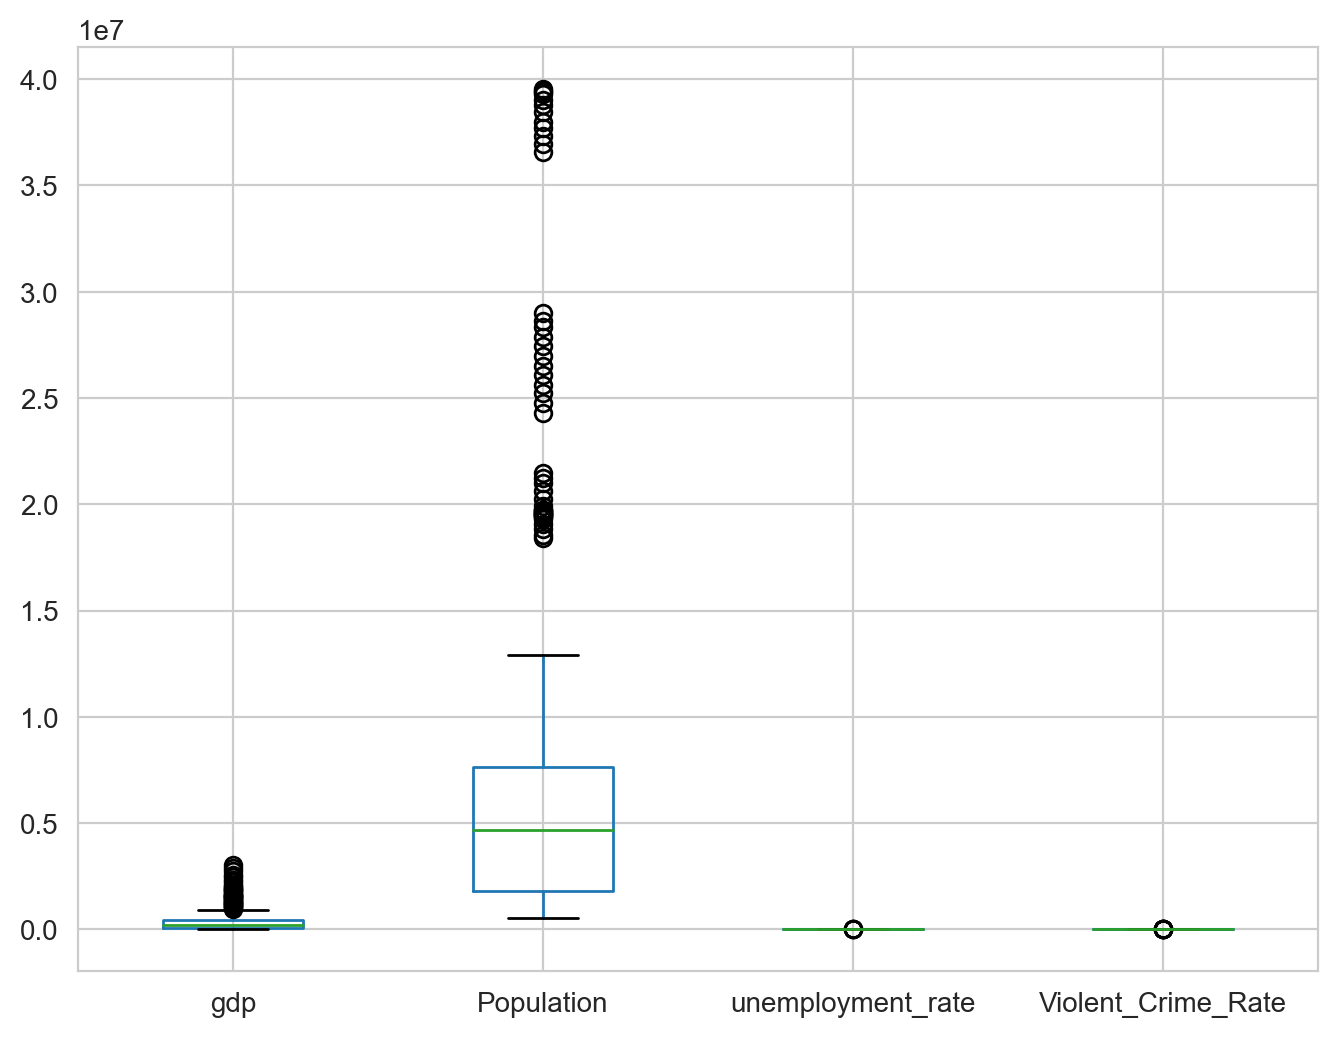

In [100]:
df.boxplot(column=['gdp', 'Population', 'unemployment_rate', 'Violent_Crime_Rate'], figsize=(8,6))
plt.show()

In [101]:
crime_rate_line_chart = alt.Chart(df).mark_line().encode(
    x='year:T',
    y='Violent_Crime_Rate:Q',
    color='state:N'
)

crime_rate_line_chart

alt.Chart(...)

In [102]:
all_states = df['state'].unique().tolist()

treatment_states = ['Alaska', 'Connecticut', 'Delaware', 'Hawaii', 'Illinois', 'Iowa',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'New Jersey', 'New Mexico', 'New York', 'North Dakota',
       'Rhode Island', 'Vermont', 'Washington', 'West Virginia',
       'Wisconsin']

control_states = [state for state in all_states if state not in treatment_states]

In [103]:
print(f'Treatment States: {treatment_states}'
and f'Control States: {control_states}')

Control States: ['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Florida', 'Georgia', 'Idaho', 'Indiana', 'Kentucky', 'Louisiana', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Virginia', 'Wyoming']


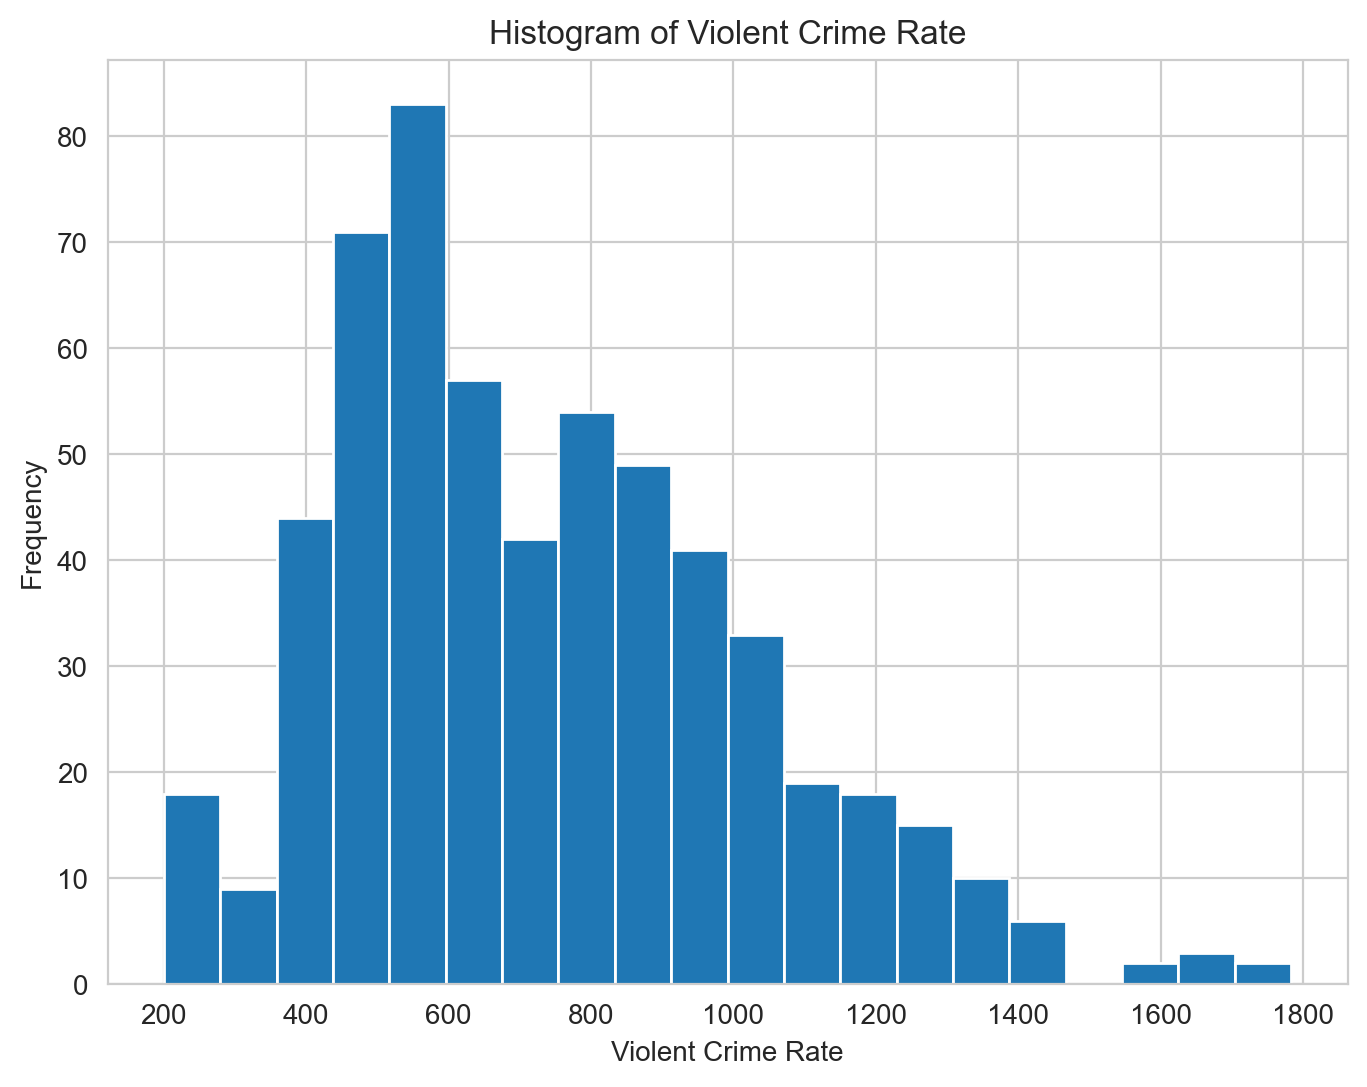

state  year  Violent_Crime_Rate
20       Alaska  2016         1609.122858
21       Alaska  2017         1658.026886
22       Alaska  2018         1783.336213
23       Alaska  2019         1734.138023
358  New Mexico  2018         1685.540638
359  New Mexico  2019         1664.418033

In [188]:
# check abnormality of crime rate
fig, ax = plt.subplots(figsize=(8,6))
vcr_hist = df['Violent_Crime_Rate'].hist(bins=20)
vcr_hist.set_title('Histogram of Violent Crime Rate')
vcr_hist.set_xlabel('Violent Crime Rate')
vcr_hist.set_ylabel('Frequency')
plt.show()

fig.savefig('../30_results/vcr_hist.png')

# find state and year where crime rate is outside of 3 standard deviations
df_abnormal = df[(df['Violent_Crime_Rate'] > df['Violent_Crime_Rate'].mean() \
                                            + 3*df['Violent_Crime_Rate'].std()) \
                | (df['Violent_Crime_Rate'] < df['Violent_Crime_Rate'].mean() \
                                            - 3*df['Violent_Crime_Rate'].std())]
df_abnormal.loc[:, ['state', 'year', 'Violent_Crime_Rate']]

In [178]:
abolish_year = { "Alaska": 1957, "Colorado": 2020, "Connecticut": 2012, 
                "Delaware": 2016, "Hawaii": 1957, "Illinois": 2011,
                "Iowa": 1965, "Maine": 1887, "Maryland": 2013, 
                "Massachusetts": 1984, "Michigan": 1847, "Minnesota": 1911,
                "New Hampshire": 2019, "New Jersey": 2007, "New Mexico": 2009,
                "New York": 2007, "North Dakota": 1973, "Rhode Island": 1984,
                "Vermont": 1972, "Virginia": 2021, "Washington": 2018,
                "West Virginia": 1965, "Wisconsin": 1853}

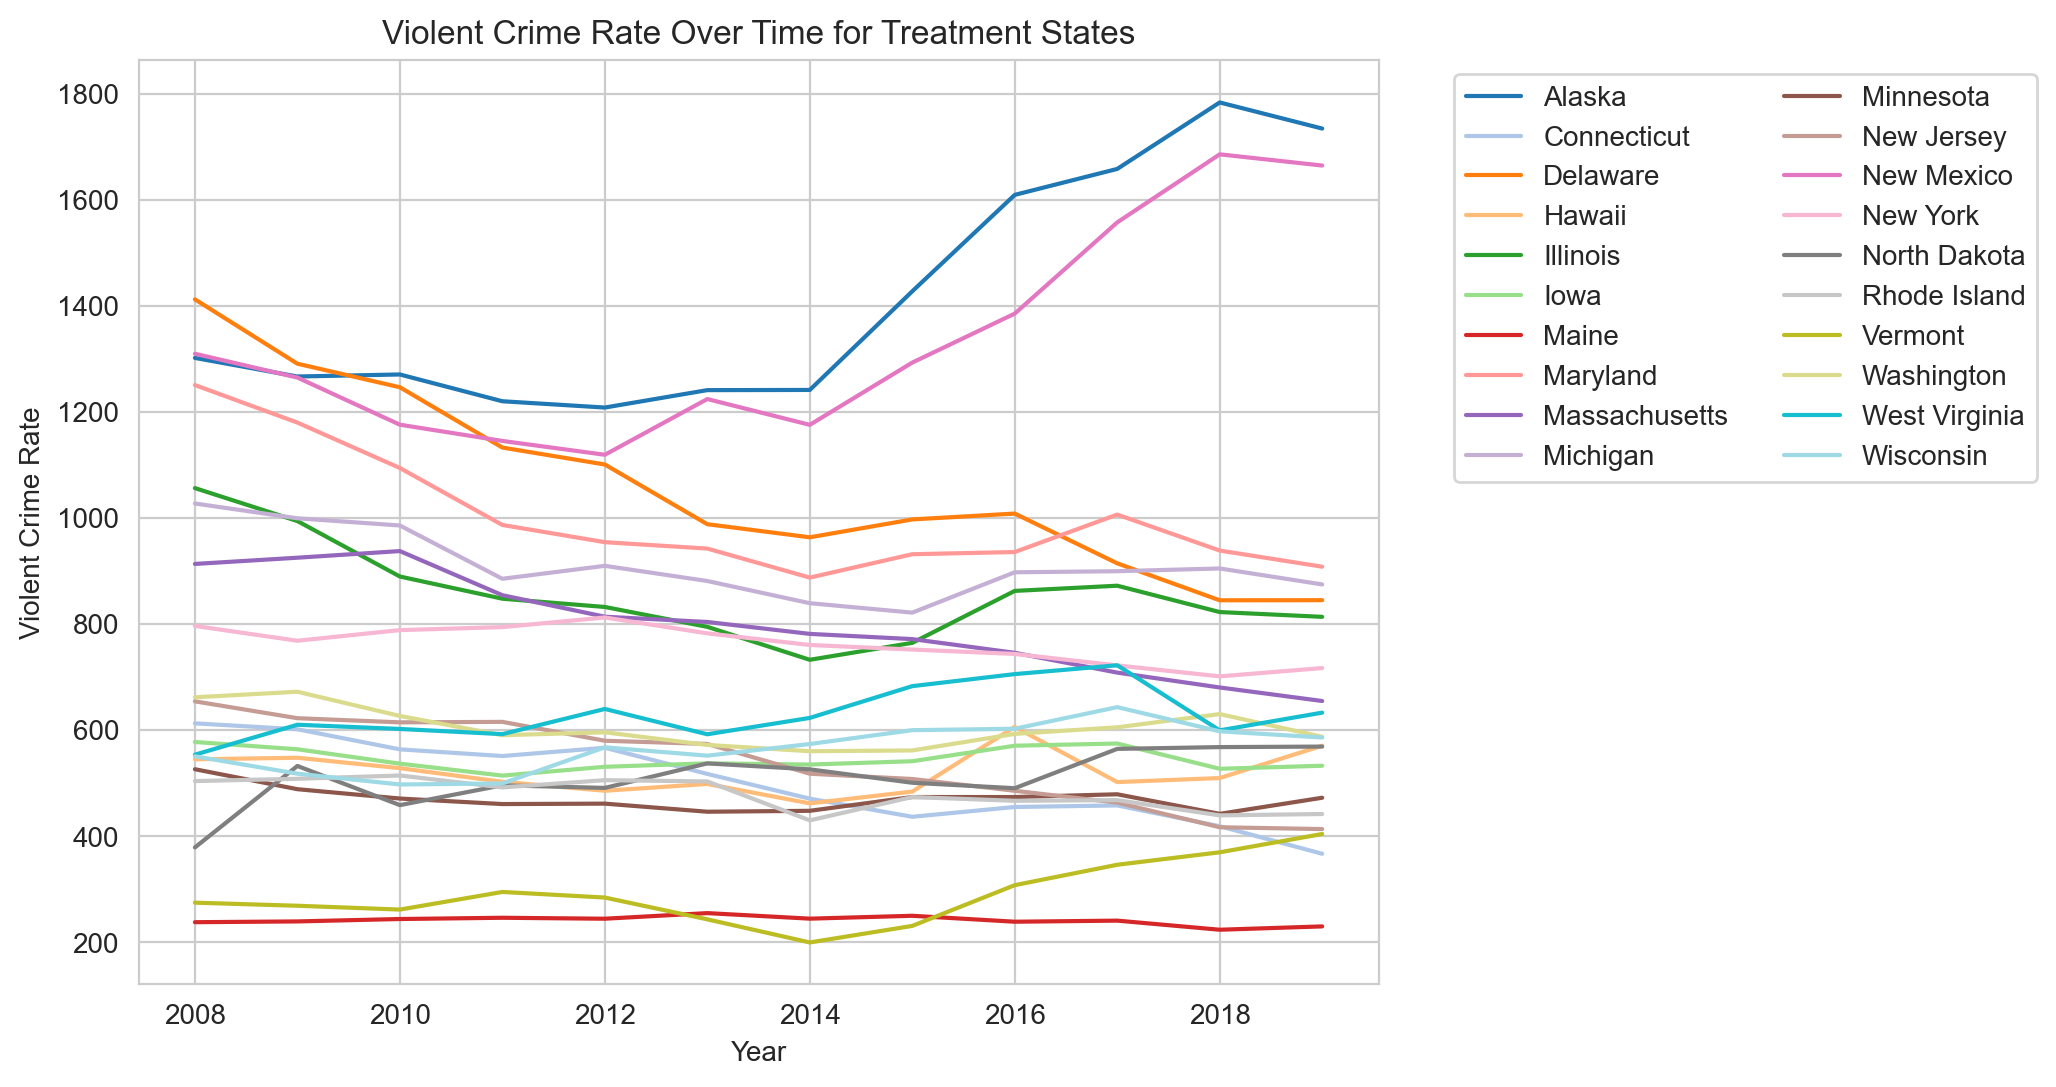

In [183]:
# plot treatment states' crime rate over time using matplotlib in a single plot
fig, ax = plt.subplots(figsize=(8,6))
# using tab20b color palette
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.tab20(np.linspace(0, 1, 20))))

for state in treatment_states:
    df[df['state']==state].plot(x='year', y='Violent_Crime_Rate', ax=ax, label=state, ) 
plt.legend(ncols=2, bbox_to_anchor=(1.05, 1))
# plt.ylim(0.001, 0.019)
plt.xlabel('Year')
plt.ylabel('Violent Crime Rate')
plt.title('Violent Crime Rate Over Time for Treatment States')

plt.show()

# save to file
fig.savefig('../30_results/treatment_states_crime_rate.png', bbox_inches='tight')

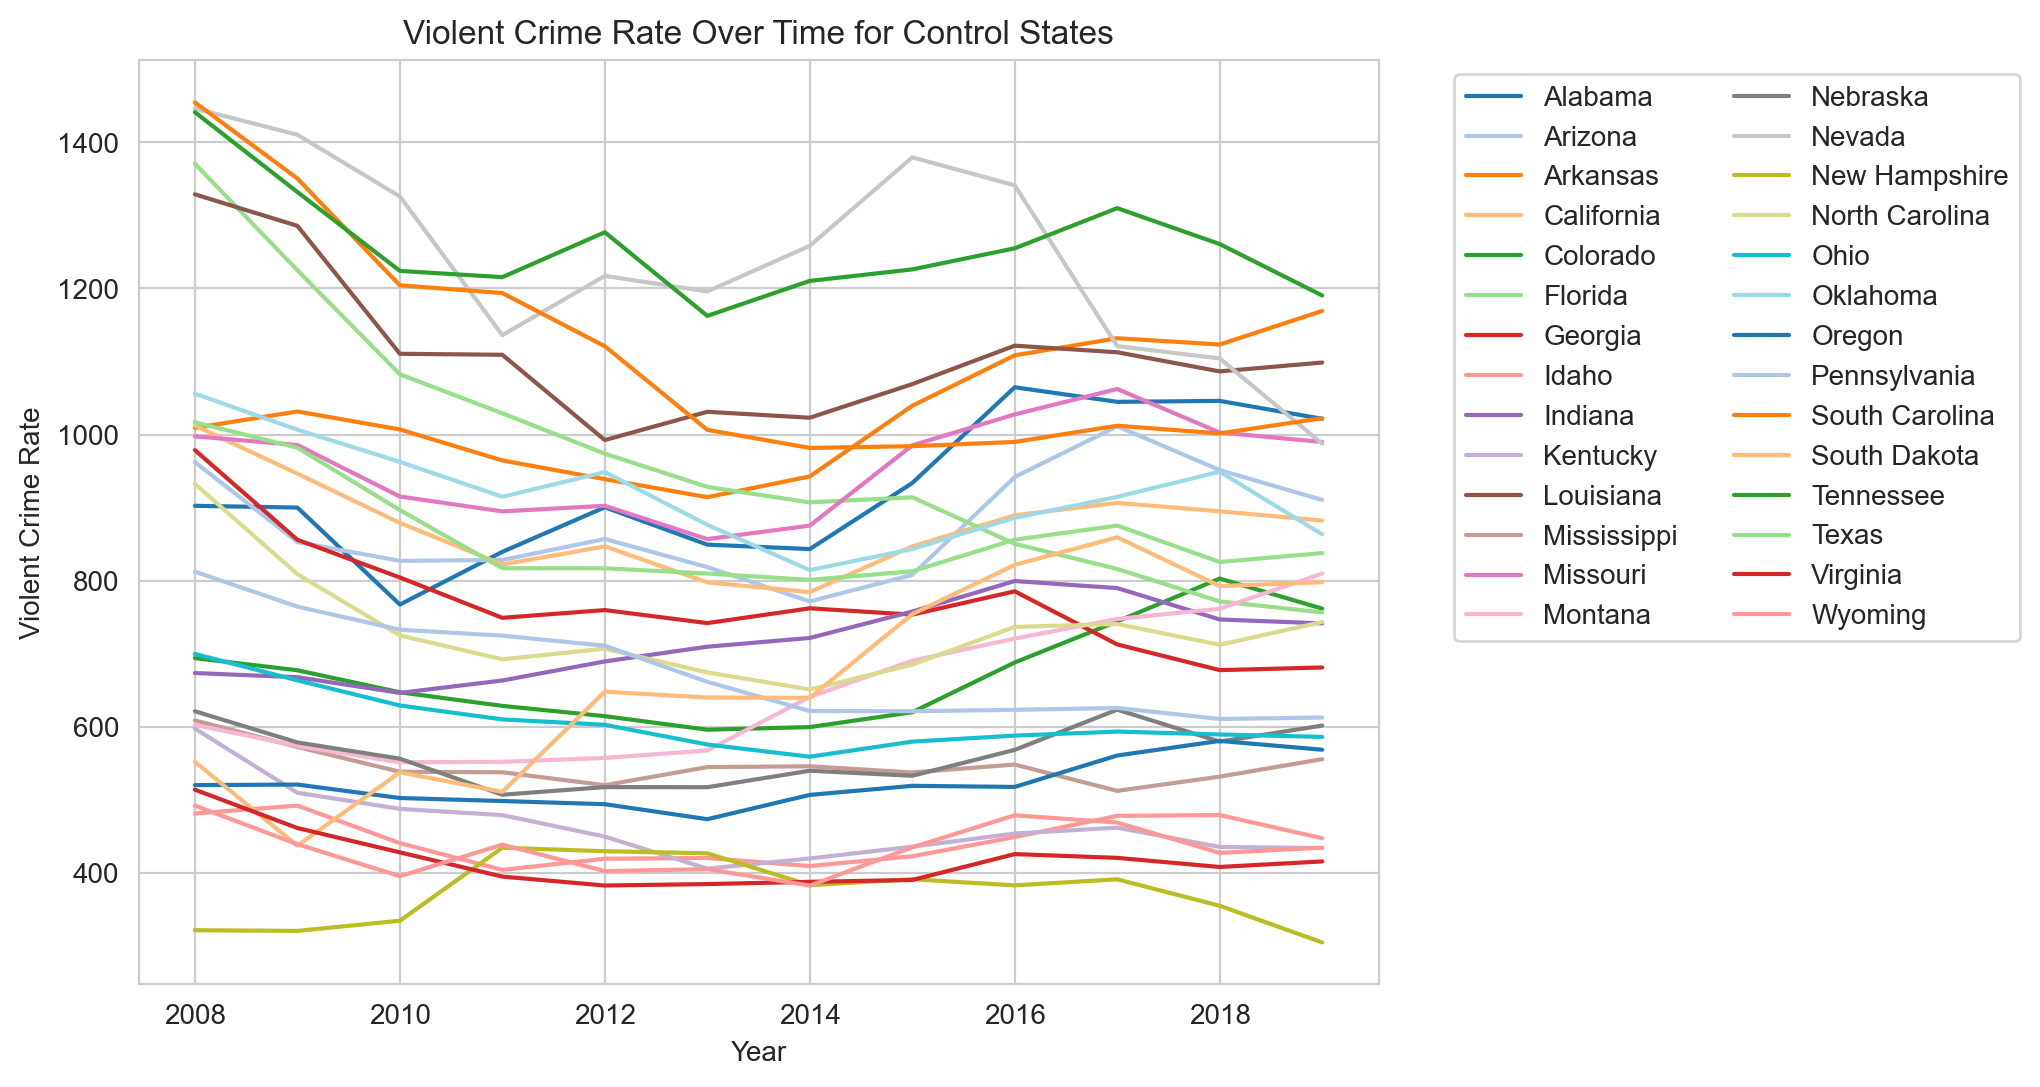

In [176]:
# plot control states' crime rate over time
fig, ax = plt.subplots(figsize=(8,6))
# using tab20b color palette
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.tab20(np.linspace(0, 1, 20))))

for state in control_states:
    df[df['state']==state].plot(x='year', y='Violent_Crime_Rate', ax=ax, label=state, )
plt.legend(ncols=2, bbox_to_anchor=(1.05, 1))
# plt.ylim(0.001, 0.019)
plt.xlabel('Year')
plt.ylabel('Violent Crime Rate')
plt.title('Violent Crime Rate Over Time for Control States')
plt.show()

# # save to file
fig.savefig('../30_results/control_states_crime_rate.png', bbox_inches='tight')

In [107]:
# Select the variables of interest
selected_vars = ['Children 0-18', 'Adults 19-25', 'Adults 26-34',
       'Adults 35-54', 'Adults 55-64', '65+', 
       'American Indian or Alaska Native', 'Asian or Pacific Islander',
       'Black or African American', 'White', 'Population', 
       'international_migration',
       'Total People Experiencing Homelessness', 'gdp',
       'gini', 
       'unemployment_rate']

# Select the statistics of interest
selected_stats = ['min', 'max','mean', 'std']

In [108]:
summary_table = df[selected_vars].describe().loc[selected_stats]
summary_table = summary_table.round(3)
summary_table

Children 0-18  Adults 19-25  Adults 26-34  Adults 35-54  Adults 55-64  \
min           0.190         0.071         0.099         0.232         0.099   
max           0.296         0.124         0.142         0.324         0.165   
mean          0.244         0.090         0.118         0.268         0.131   
std           0.019         0.006         0.008         0.017         0.011   

        65+  American Indian or Alaska Native  Asian or Pacific Islander  \
min   0.074                          3011.000                   5239.000   
max   0.213                        790100.000                6751372.000   
mean  0.148                         91280.887                 393360.330   
std   0.022                        132596.492                 898392.264   

      Black or African American         White   Population  \
min                    6502.000  4.037750e+05    532981.00   
max                 3898379.000  2.915865e+07  39512223.00   
mean                 904805.602  5.080361e+06   6472218.71   
std                 1036083.244  5.469300e+06   7142130.35   

      international_migration  Total People Experiencing Homelessness  \
min                  -697.000                                 515.000   
max                167173.000                              151278.000   
mean                16573.111                               11969.399   
std                 27126.218                               21143.996   

              gdp   gini  unemployment_rate  
min     25999.300  0.400              0.024  
max   3042694.100  0.516              0.138  
mean   351650.726  0.461              0.060  
std    436006.192  0.020              0.023

In [109]:
summary_table.to_csv('../20_intermediate_files/summary_table.csv')

In [110]:
crime_vars = ['Violent',
       'Property', 'Murder', 'Rape', 'Robbery', 'Aggravated Assault',
       'Burglary', 'Larceny-Theft', 'Vehicle Theft', 'with_death_penalty',
       'Violent_Crimes', 'Violent_Crime_Rate']

In [111]:
summary_table_2 = df[crime_vars].describe().loc[selected_stats]
summary_table_2 = summary_table_2.round(3)
summary_table_2 

Violent     Property    Murder       Rape    Robbery  \
min      643.000     8211.000     5.000     85.000     53.000   
max   185173.000  1080766.000  2142.000  15506.000  69385.000   
mean   25640.944   171026.875   319.719   2052.007   7034.016   
std    31545.421   195771.375   363.166   2295.517  10108.506   

      Aggravated Assault    Burglary  Larceny-Theft  Vehicle Theft  \
min              444.000    1275.000       6451.000        196.000   
max           105541.000  245767.000     678455.000     192529.000   
mean           16021.609   36472.707     119228.307      15325.958   
std            19225.258   43519.134     131319.729      24959.546   

      with_death_penalty  Violent_Crimes  Violent_Crime_Rate  
min                0.000        1254.000             200.074  
max                1.000      370346.000            1783.336  
mean               0.648       51068.295             738.503  
std                0.478       62909.913             289.727

In [112]:
correlation_matrix = df[selected_vars].corr()

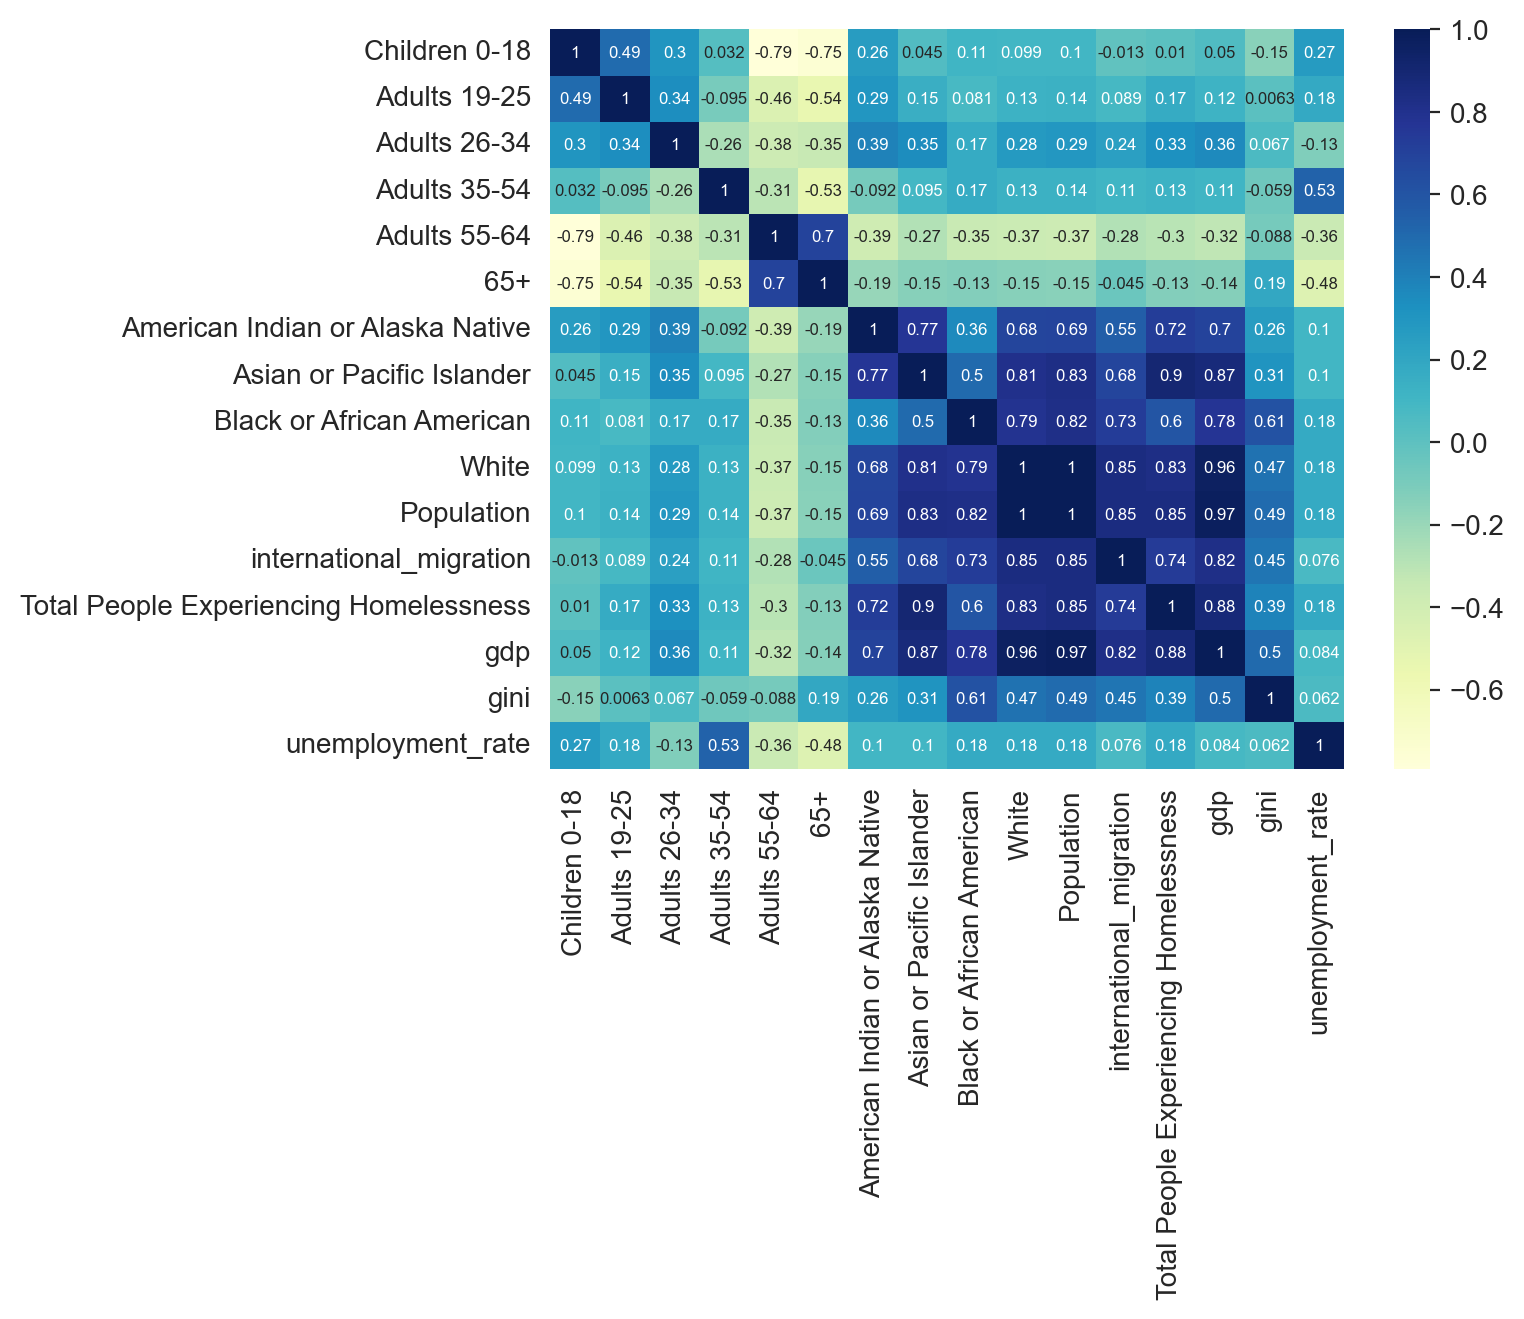

In [113]:
sns.heatmap(correlation_matrix, annot=True,cmap="YlGnBu", annot_kws={"fontsize":6})
plt.show()

In [114]:
df['gdp_per_capita'] = df['gdp']/df['Population']
df['Adults 55+'] = df['Adults 55-64'] + df['65+']

In [115]:
updated_vars = ['Children 0-18', 'Adults 19-25', 'Adults 26-34',
       'Adults 35-54', 'Adults 55+',
       'international_migration',
       'Total People Experiencing Homelessness', 
       'gini', 'gdp_per_capita',
       'unemployment_rate']

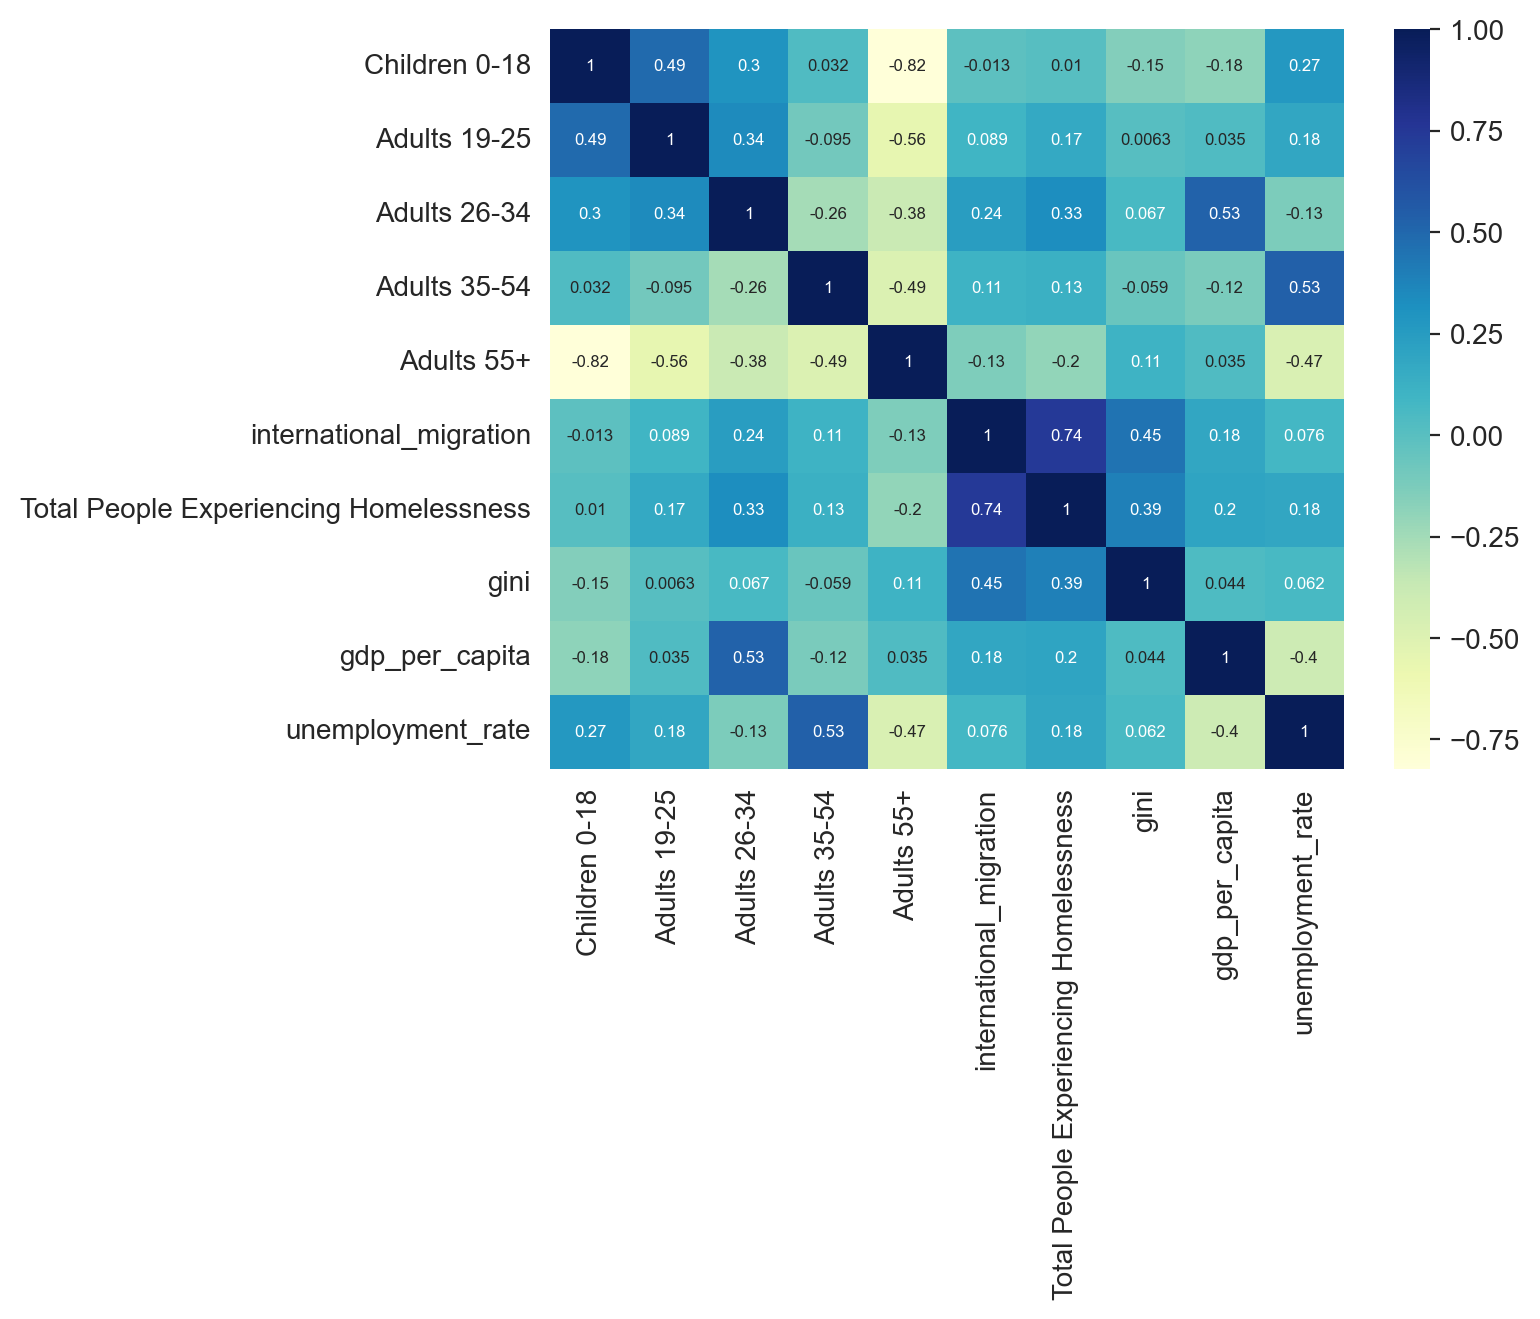

In [116]:
correlation_matrix_2 = df[updated_vars].corr()
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix_2, annot=True,cmap="YlGnBu", annot_kws={"fontsize":6})

# Display the plot
plt.show()

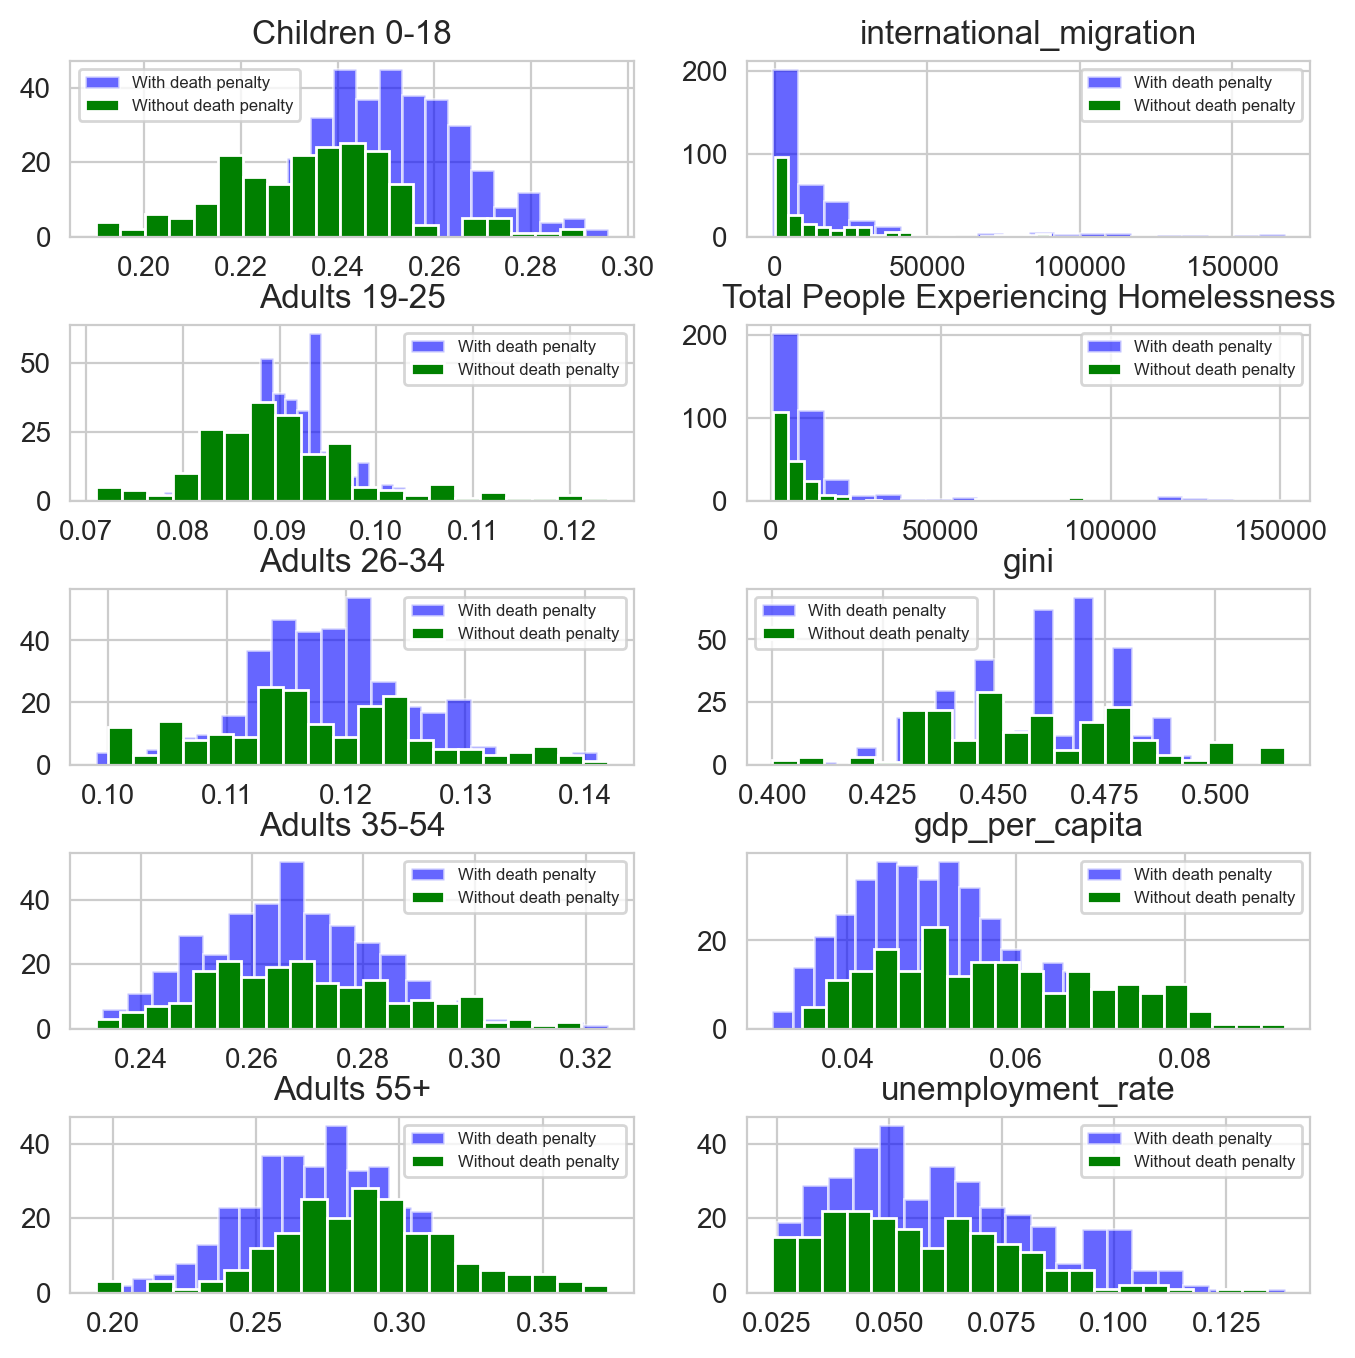

In [117]:
death_penalty = df[df['with_death_penalty'] == 1][updated_vars]
no_death_penalty = df[df['with_death_penalty'] == 0][updated_vars]
# Create histograms of the variables
#fig, axs = plt.subplots(nrows=len(updated_vars), ncols=1, figsize=(8,40))
fig, axs = plt.subplots(5,2,figsize=(8,8))

for i, var in enumerate(updated_vars):
    axs[i%5][i//5].hist(death_penalty[var], color='blue', alpha=0.6, bins=20, label='With death penalty')
    axs[i%5][i//5].hist(no_death_penalty[var], color='green', bins=20, label='Without death penalty')
    axs[i%5][i//5].set_title(var)
    axs[i%5][i//5].legend(fontsize=6)

#plt.tight_layout()
fig.subplots_adjust(hspace=0.5)
plt.show()

In [118]:
w_death_penalty_chart = alt.Chart(df[df['with_death_penalty']==1]).mark_boxplot().encode(
    x='year:T',
    y='Violent_Crime_Rate:Q',
    color = alt.Color('with_death_penalty:N', scale=alt.Scale(scheme='set2'))
    #color='with_death_penalty:N',
    #column='with_death_penalty:N',
    #tooltip=['year:T', 'Violent_Crime_Rate:Q', 'with_death_penalty:N'],

)
wo_death_penalty_chart = alt.Chart(df[df['with_death_penalty']==0]).mark_boxplot().encode(
    x='year:T',
    y='Violent_Crime_Rate:Q',
    color = alt.Color('with_death_penalty:N', scale=alt.Scale(scheme='set2'))
)
(w_death_penalty_chart | wo_death_penalty_chart)

#death_penalty_chart.properties(title='Violent Crime Rate by Year and Death Penalty Status')

alt.HConcatChart(...)

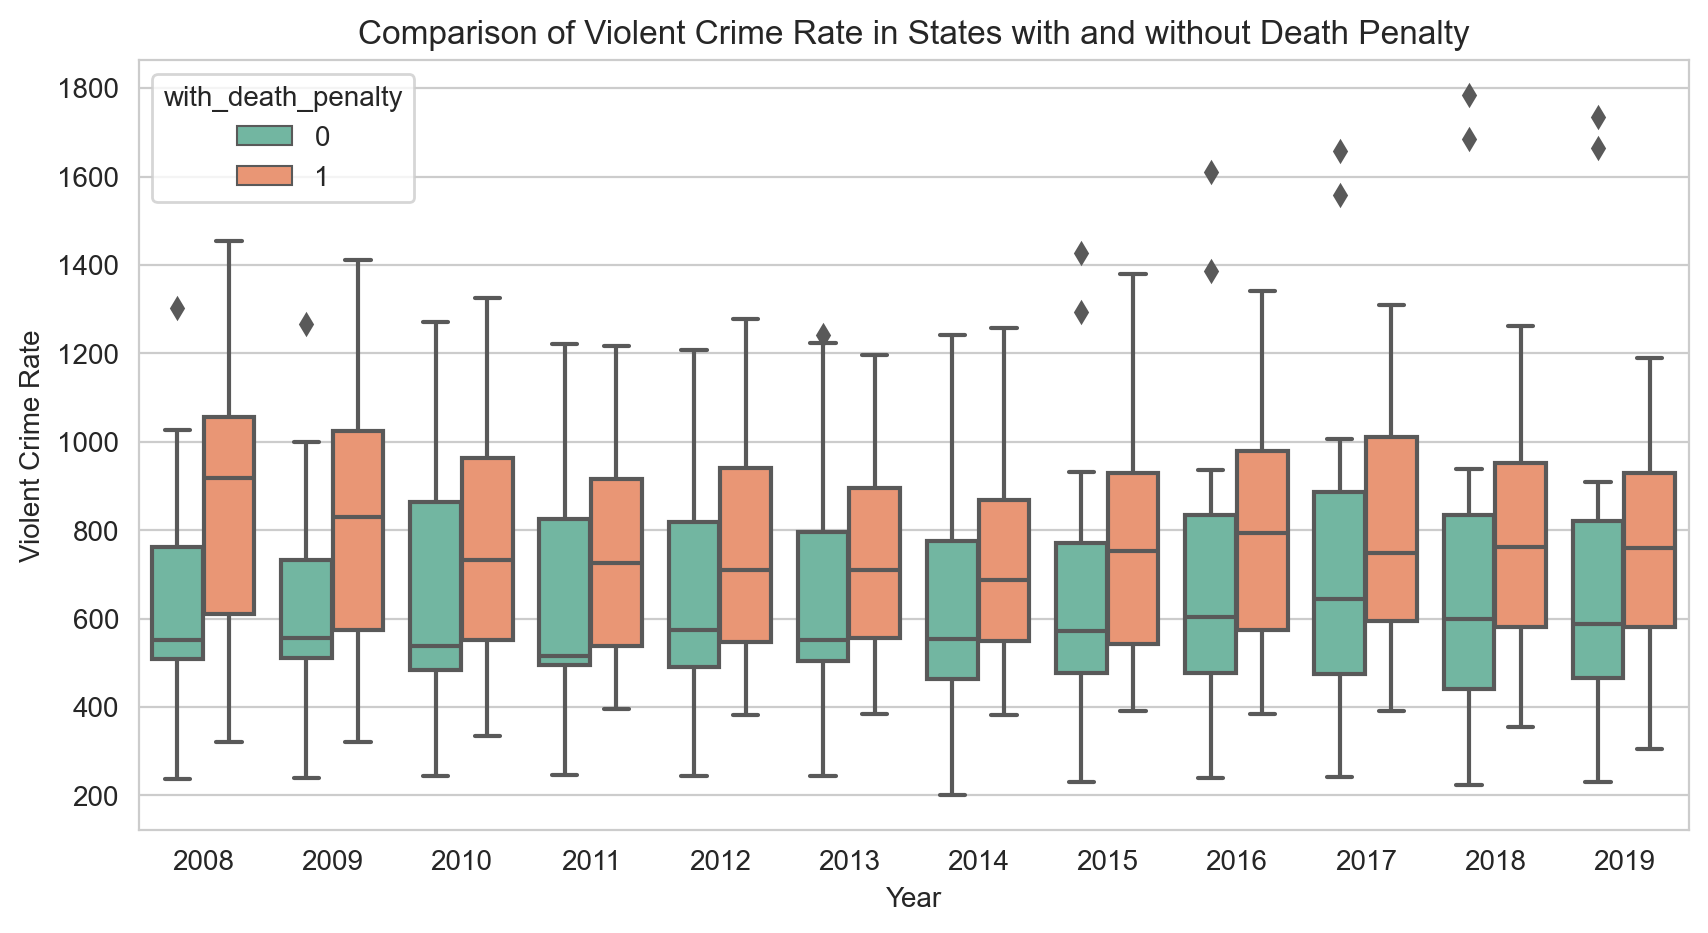

In [119]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 5))

sns.boxplot(data=df, x='year', y='Violent_Crime_Rate', hue='with_death_penalty', dodge=True, palette='Set2')

ax.set_xlabel('Year')
ax.set_ylabel('Violent Crime Rate')
ax.set_title('Comparison of Violent Crime Rate in States with and without Death Penalty')

plt.show()

In [120]:
abolish_year = { "Alaska": 1957, "Colorado": 2020, "Connecticut": 2012, 
                "Delaware": 2016, "Hawaii": 1957, "Illinois": 2011,
                "Iowa": 1965, "Maine": 1887, "Maryland": 2013, 
                "Massachusetts": 1984, "Michigan": 1847, "Minnesota": 1911,
                "New Hampshire": 2019, "New Jersey": 2007, "New Mexico": 2009,
                "New York": 2007, "North Dakota": 1973, "Rhode Island": 1984,
                "Vermont": 1972, "Virginia": 2021, "Washington": 2018,
                "West Virginia": 1965, "Wisconsin": 1853}

### Case: Diff-in-Diff

In [121]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [122]:
def model_reg(data, Y, X, alpha=0.05):
   
    x = data.loc[pd.notnull(data[Y]), X]
    xmin = x.min()
    xmax = x.max()
    step = (xmax - xmin) / 100
    grid = np.arange(xmin, xmax + step, step)
    predictions = pd.DataFrame({X: grid})
    model = smf.ols(f"{Y} ~ {X}", data=data).fit()
    model_predict = model.get_prediction(predictions[X])
    predictions[Y] = model_predict.summary_frame()["mean"]
    predictions[["ci_low", "ci_high"]] = model_predict.conf_int(alpha=alpha)
    return predictions

In [123]:
def build_chart(data, Y, X, alpha=0.05,colour='grey',indicator='Control States'):
    predictions = model_reg(data, Y, X, alpha)
    predictions['Category'] = indicator
    base = alt.Chart(predictions).mark_line(color=colour).encode(
        x=alt.X(
            X, 
            scale=alt.Scale(zero=False), 
            axis = alt.Axis(format="T", 
            title = "Year")), 
        y = alt.Y(
            Y, 
            scale=alt.Scale(zero=False),
            title = "Violent Crime Rate"),
        color=alt.Color("Category", legend=alt.Legend(title="Legend")),
    )
    ci = (
        alt.Chart(predictions)
        .mark_errorband(color = 'grey',opacity=0.2)
        .encode(
            x=X,
            y=alt.Y("ci_low", title=""),
            y2="ci_high",
        )
    )
    chart = ci + base
    return chart

Find control states via KMeans clustering

In [124]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [125]:
variables = ['Population', 'gdp_per_capita', 'unemployment_rate', 'Violent_Crime_Rate']

In [126]:
k_df = df.copy()
k_df = k_df[variables]

In [127]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(k_df)

In [128]:
# Cluster data
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_scaled)
labels = kmeans.labels_

In [129]:
# Add cluster labels to data
df['Cluster'] = labels

#### 1. Illinois
abolish in 2011

In [130]:
# Find states in the same cluster as Illinois
illinois_cluster = df.loc[df['state'] == 'Illinois', 'Cluster'].values[0]
similar_states = df.loc[df['Cluster'] == illinois_cluster, 'state'].unique().tolist()

print(similar_states)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Illinois', 'Indiana', 'Louisiana', 'Maryland', 'Massachusetts', 'Michigan', 'Missouri', 'Nevada', 'New Mexico', 'North Carolina', 'Oklahoma', 'Pennsylvania', 'South Carolina', 'Tennessee']


In [131]:
# compare_states1 = ['Alabama', 'Arizona', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Illinois','Indiana','Louisiana']
# compare_states2 = ['Illinois', 'Missouri', 'Nevada','North Carolina', 'Oklahoma', 'Pennsylvania', 'South Carolina', 'Tennessee']
# case_df = df.copy()
# case_df = case_df[case_df['state'].isin(compare_states1) & (case_df['year'] >= 2000) & (case_df['year'] <= 2011)]

# case_graph = alt.Chart(case_df).mark_line().encode(
#     x='year:T',
#     y='Violent_Crime_Rate:Q',
#     color='state:N'
# )

# case_graph

# case_df = df.copy()
# case_df = case_df[case_df['state'].isin(compare_states2) & (case_df['year'] >= 2000) & (case_df['year'] <= 2011)]

# case_graph = alt.Chart(case_df).mark_line().encode(
#     x='year:T',
#     y='Violent_Crime_Rate:Q',
#     color='state:N'
# )

# case_graph

# # Pennsylvania, South Carolina, Florida
# case_states = ['Illinois', 'Pennsylvania', 'South Carolina', 'Florida']
# case_df = df.copy()
# case_df = case_df[case_df['state'].isin(case_states) & (case_df['year'] >= 2006) & (case_df['year'] <= 2017)]

abolish_year = { "Alaska": 1957, "Colorado": 2020, "Connecticut": 2012, 
                "Delaware": 2016, "Hawaii": 1957, "Illinois": 2011,
                "Iowa": 1965, "Maine": 1887, "Maryland": 2013, 
                "Massachusetts": 1984, "Michigan": 1847, "Minnesota": 1911,
                "New Hampshire": 2019, "New Jersey": 2007, "New Mexico": 2009,
                "New York": 2007, "North Dakota": 1973, "Rhode Island": 1984,
                "Vermont": 1972, "Virginia": 2021, "Washington": 2018,
                "West Virginia": 1965, "Wisconsin": 1853}

In [132]:
IL_compare_states = ['Alabama', 'Arizona', 'Arkansas', 'Florida', 'Georgia', \
                    'Indiana', 'Louisiana', 'Missouri', 'Nevada', 'North Carolina', \
                    'Oklahoma', 'Pennsylvania', 'South Carolina', 'Tennessee']
print(len(IL_compare_states))
# plot the crime rate of Delaware and the states in DE compare states in 2015, 2016
IL_case_df = df.copy()
IL_case_states = IL_compare_states + ['Illinois']
IL_case_df = IL_case_df[IL_case_df['state'].isin(IL_case_states) & (IL_case_df['year'] >= 2015) \
                        & (IL_case_df['year'] <= 2016)]

IL_case_graph = alt.Chart(IL_case_df).mark_line().encode(
    x='year:T',
    y='Violent_Crime_Rate:Q',
    color='state:N'
)

IL_case_graph

14


alt.Chart(...)

In [133]:
# prepare data for difference in difference analysis
IL_case_df = df.copy()
IL_case_df = IL_case_df[IL_case_df['state'].isin(IL_case_states)]

In [134]:
IL = IL_case_df.copy()
pre_IL_tr = IL[(IL['year'] <= 2011) & (IL['state'] == 'Illinois')]
post_IL_tr = IL[(IL['year'] >= 2012) & (IL['year'] <= 2017) & (IL['state'] == 'Illinois')]
pre_IL_ctr = IL[(IL['year'] <= 2011) & (IL['state'] != 'Illinois')]
post_IL_ctr = IL[(IL['year'] >= 2012) & (IL['year'] <= 2017) & (IL['state'] != 'Illinois')]

In [135]:
pre_IL_plot = build_chart(pre_IL_tr,  "Violent_Crime_Rate", "year", \
                          alpha=0.02, colour='red', indicator='Illinois')
post_IL_plot = build_chart(post_IL_tr, "Violent_Crime_Rate", "year",\
                           alpha=0.02,colour='red',indicator='Illinois')

pre_IL_ctr_plot = build_chart(pre_IL_ctr,  "Violent_Crime_Rate", "year",
    alpha=0.02,colour='blue',indicator='Control States')
post_IL_ctr_plot = build_chart(post_IL_ctr,  "Violent_Crime_Rate", "year",
    alpha=0.02,colour='blue',indicator='Control States')


diff_in_diff_IL = pre_IL_plot + post_IL_plot + pre_IL_ctr_plot + post_IL_ctr_plot
diff_in_diff_IL.properties(title=\
            "Difference in Difference Analysis of Violent Crime Rate between Illinois")

alt.LayerChart(...)

#### Maryland
abolish in 2013

In [136]:
# Find states in the same cluster as Illinois
MD_cluster = df.loc[df['state'] == 'Maryland', 'Cluster'].values[0]
MD_similar_states = df.loc[df['Cluster'] == MD_cluster, 'state'].unique().tolist()

print(MD_similar_states)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Illinois', 'Indiana', 'Louisiana', 'Maryland', 'Massachusetts', 'Michigan', 'Missouri', 'Nevada', 'New Mexico', 'North Carolina', 'Oklahoma', 'Pennsylvania', 'South Carolina', 'Tennessee']


abolish_year = { "Alaska": 1957, "Colorado": 2020, "Connecticut": 2012, "Delaware": 2016, "Hawaii": 1957, "Illinois": 2011, "Iowa": 1965, "Maine": 1887, "Maryland": 2013, "Massachusetts": 1984, "Michigan": 1847, "Minnesota": 1911, "New Hampshire": 2019, "New Jersey": 2007, "New Mexico": 2009, "New York": 2007, "North Dakota": 1973, "Rhode Island": 1984, "Vermont": 1972, "Virginia": 2021, "Washington": 2018, "West Virginia": 1965, "Wisconsin": 1853}

In [137]:
MD_compare_states = ['Alabama', 'Arizona', 'Arkansas', 'Florida', 'Georgia', 'Indiana', 'Louisiana', \
                     'Missouri', 'Nevada', 'North Carolina', 'Oklahoma', 'Pennsylvania', 'South Carolina',\
                     'Tennessee']
print(len(MD_compare_states))
# plot the crime rate of Delaware and the states in DE compare states in 2015, 2016
MD_case_df = df.copy()
MD_case_states = MD_compare_states + ['Maryland']
MD_case_df = MD_case_df[MD_case_df['state'].isin(MD_case_states) & (MD_case_df['year'] >= 2013) \
                        & (MD_case_df['year'] <= 2014)]

MD_case_graph = alt.Chart(MD_case_df).mark_line().encode(
    x='year:T',
    y='Violent_Crime_Rate:Q',
    color='state:N'
)

MD_case_graph

14


alt.Chart(...)

In [138]:
# prepare data for difference in difference analysis
MD_case_df = df.copy()
MD_case_df = MD_case_df[MD_case_df['state'].isin(MD_case_states)]

In [139]:
MD = MD_case_df.copy()
pre_MD_tr = MD[(MD['year'] <= 2013) & (MD['state'] == 'Maryland')]
post_MD_tr = MD[(MD['year'] >= 2014) & (MD['year'] <= 2017) & (MD['state'] == 'Maryland')]
pre_MD_ctr = MD[(MD['year'] <= 2013) & (MD['state'] != 'Maryland')]
post_MD_ctr = MD[(MD['year'] >= 2014) & (MD['year'] <= 2017) & (MD['state'] != 'Maryland')]

In [140]:
pre_MD_plot = build_chart(pre_MD_tr,  "Violent_Crime_Rate", "year", \
                          alpha=0.02, colour='red', indicator='Maryland')
post_MD_plot = build_chart(post_MD_tr, "Violent_Crime_Rate", "year",\
                           alpha=0.02,colour='red',indicator='Maryland')

pre_MD_ctr_plot = build_chart(pre_MD_ctr,  "Violent_Crime_Rate", "year",
    alpha=0.02,colour='blue',indicator='Control States')
post_MD_ctr_plot = build_chart(post_MD_ctr,  "Violent_Crime_Rate", "year",
    alpha=0.02,colour='blue',indicator='Control States')


diff_in_diff_MD = pre_MD_plot + post_MD_plot + pre_MD_ctr_plot + post_MD_ctr_plot
diff_in_diff_MD.properties(title=\
                "Difference in Difference Analysis of Violent Crime Rate between Maryland")

alt.LayerChart(...)

#### Connecticut

In [141]:
# Find states in the same cluster as CONNECTICUT
CT_cluster = df.loc[df['state'] == 'Connecticut', 'Cluster'].values[0]
CT_similar_states = df.loc[df['Cluster'] == CT_cluster, 'state'].unique().tolist()

print(CT_similar_states)

['Colorado', 'Connecticut', 'Delaware', 'Georgia', 'Hawaii', 'Illinois', 'Indiana', 'Iowa', 'Maryland', 'Massachusetts', 'Minnesota', 'Nebraska', 'New Hampshire', 'New Jersey', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Dakota', 'Vermont', 'Virginia', 'Washington', 'Wisconsin', 'Wyoming']


abolish_year = { "Alaska": 1957, "Colorado": 2020, "Connecticut": 2012, "Delaware": 2016, "Hawaii": 1957, "Illinois": 2011, "Iowa": 1965, "Maine": 1887, "Maryland": 2013, "Massachusetts": 1984, "Michigan": 1847, "Minnesota": 1911, "New Hampshire": 2019, "New Jersey": 2007, "New Mexico": 2009, "New York": 2007, "North Dakota": 1973, "Rhode Island": 1984, "Vermont": 1972, "Virginia": 2021, "Washington": 2018, "West Virginia": 1965, "Wisconsin": 1853}

In [142]:
CT_compare_states = ['Georgia', 'Indiana', 'Nebraska','North Carolina', 'Ohio', 'Oregon', \
                     'Pennsylvania', 'South Dakota', 'Wyoming']
# plot the crime rate of Delaware and the states in DE compare states in 2015, 2016
CT_case_df = df.copy()
CT_case_states = CT_compare_states + ['Connecticut']
CT_case_df = CT_case_df[CT_case_df['state'].isin(CT_case_states) & (CT_case_df['year'] >= 2012) \
                        & (CT_case_df['year'] <= 2013)]

CT_case_graph = alt.Chart(CT_case_df).mark_line().encode(
    x='year:T',
    y='Violent_Crime_Rate:Q',
    color='state:N'
)

CT_case_graph

alt.Chart(...)

In [143]:
CT_case_df = df.copy()
CT_case_df = CT_case_df[CT_case_df['state'].isin(CT_case_states)]

In [144]:
CT = CT_case_df.copy()
pre_CT_tr = CT[(CT['year'] <= 2012) & (CT['state'] == 'Connecticut')]
post_CT_tr = CT[(CT['year'] >= 2013)& (CT['year'] <= 2017) & (CT['state'] == 'Connecticut')]
pre_CT_ctr = CT[(CT['year'] <= 2012) & (CT['state'] != 'Connecticut')]
post_CT_ctr = CT[(CT['year'] >= 2013)& (CT['year'] <= 2017) & (CT['state'] != 'Connecticut')]

In [145]:
pre_CT_plot = build_chart(pre_CT_tr,  "Violent_Crime_Rate", "year", \
                        alpha=0.02, colour='red', indicator='Connecticut')
post_CT_plot = build_chart(post_CT_tr, "Violent_Crime_Rate", "year",\
                           alpha=0.02,colour='red',indicator='Connecticut')

pre_CT_ctr_plot = build_chart(pre_CT_ctr,  "Violent_Crime_Rate", "year",
    alpha=0.02,colour='blue',indicator='Control States')
post_CT_ctr_plot = build_chart(post_CT_ctr,  "Violent_Crime_Rate", "year",
    alpha=0.02,colour='blue',indicator='Control States')


diff_in_diff_CT = pre_CT_plot + post_CT_plot + pre_CT_ctr_plot + post_CT_ctr_plot
diff_in_diff_CT.properties(title=\
                "Difference in Difference Analysis of Violent Crime Rate between Connecticut")

alt.LayerChart(...)

# Panel Analysis

In [146]:
from linearmodels.panel import PanelOLS

In [147]:
#rename the columns
df = df.rename(columns={'Children 0-18': 'children', 'Adults 19-25': 'adults_19_25', 'Adults 26-34': 'adults_26_34',
         'Adults 35-54': 'adults_35_54', 'Adults 55+': 'adults_55_plus', 'Total People Experiencing Homelessness': 'homelessness'})

In [148]:
trick_states = ['Arizona', 'Oregon', 'Pennsylvania']

In [149]:
# Define the conditions and values for the three categories
conditions = [
    df['state'].isin(trick_states),
    df['with_death_penalty'] == 1,
    df['with_death_penalty'] == 0
]
values = [3, 2, 1]

# Apply the conditions and values using np.select()
df['penalty_category'] = np.select(conditions, values)

In [150]:
df['penalty_category'].value_counts()
   

2    337
1    203
3     36
Name: penalty_category, dtype: int64

### Regression on all states

In [189]:
# Specify the panel data variables
panel_vars = ['State', 'year']

# Specify the independent and dependent variables
y_var = 'Violent_Crime_Rate'
# x_vars = ['with_death_penalty','children', 'adults_19_25', 'adults_26_34',
#        'adults_35_54', 'adults_55_plus',
#        'international_migration',
#        'homelessness', 
#        'gini', 'gdp_per_capita',
#        'unemployment_rate']

x_vars = ['with_death_penalty',
       'gini', 'gdp_per_capita',
       'unemployment_rate']

# Create a panel data structure
df_panel = df.set_index(panel_vars)

# Run a fixed effects regression with time and entity fixed effects
model = PanelOLS.from_formula(f"{y_var} ~ 1 + {' + '.join(x_vars)} + EntityEffects + TimeEffects", data=df_panel)
results = model.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)

In [190]:
print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:     Violent_Crime_Rate   R-squared:                        0.1524
Estimator:                   PanelOLS   R-squared (Between):              0.0498
No. Observations:                 576   R-squared (Within):              -0.5898
Date:                Mon, May 01 2023   R-squared (Overall):             -0.0063
Time:                        05:14:47   Log-likelihood                   -3281.3
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      23.064
Entities:                          48   P-value                           0.0000
Avg Obs:                       12.000   Distribution:                   F(4,513)
Min Obs:                       12.000                                           
Max Obs:                       12.000   F-statistic (robust):             6.4783
                            

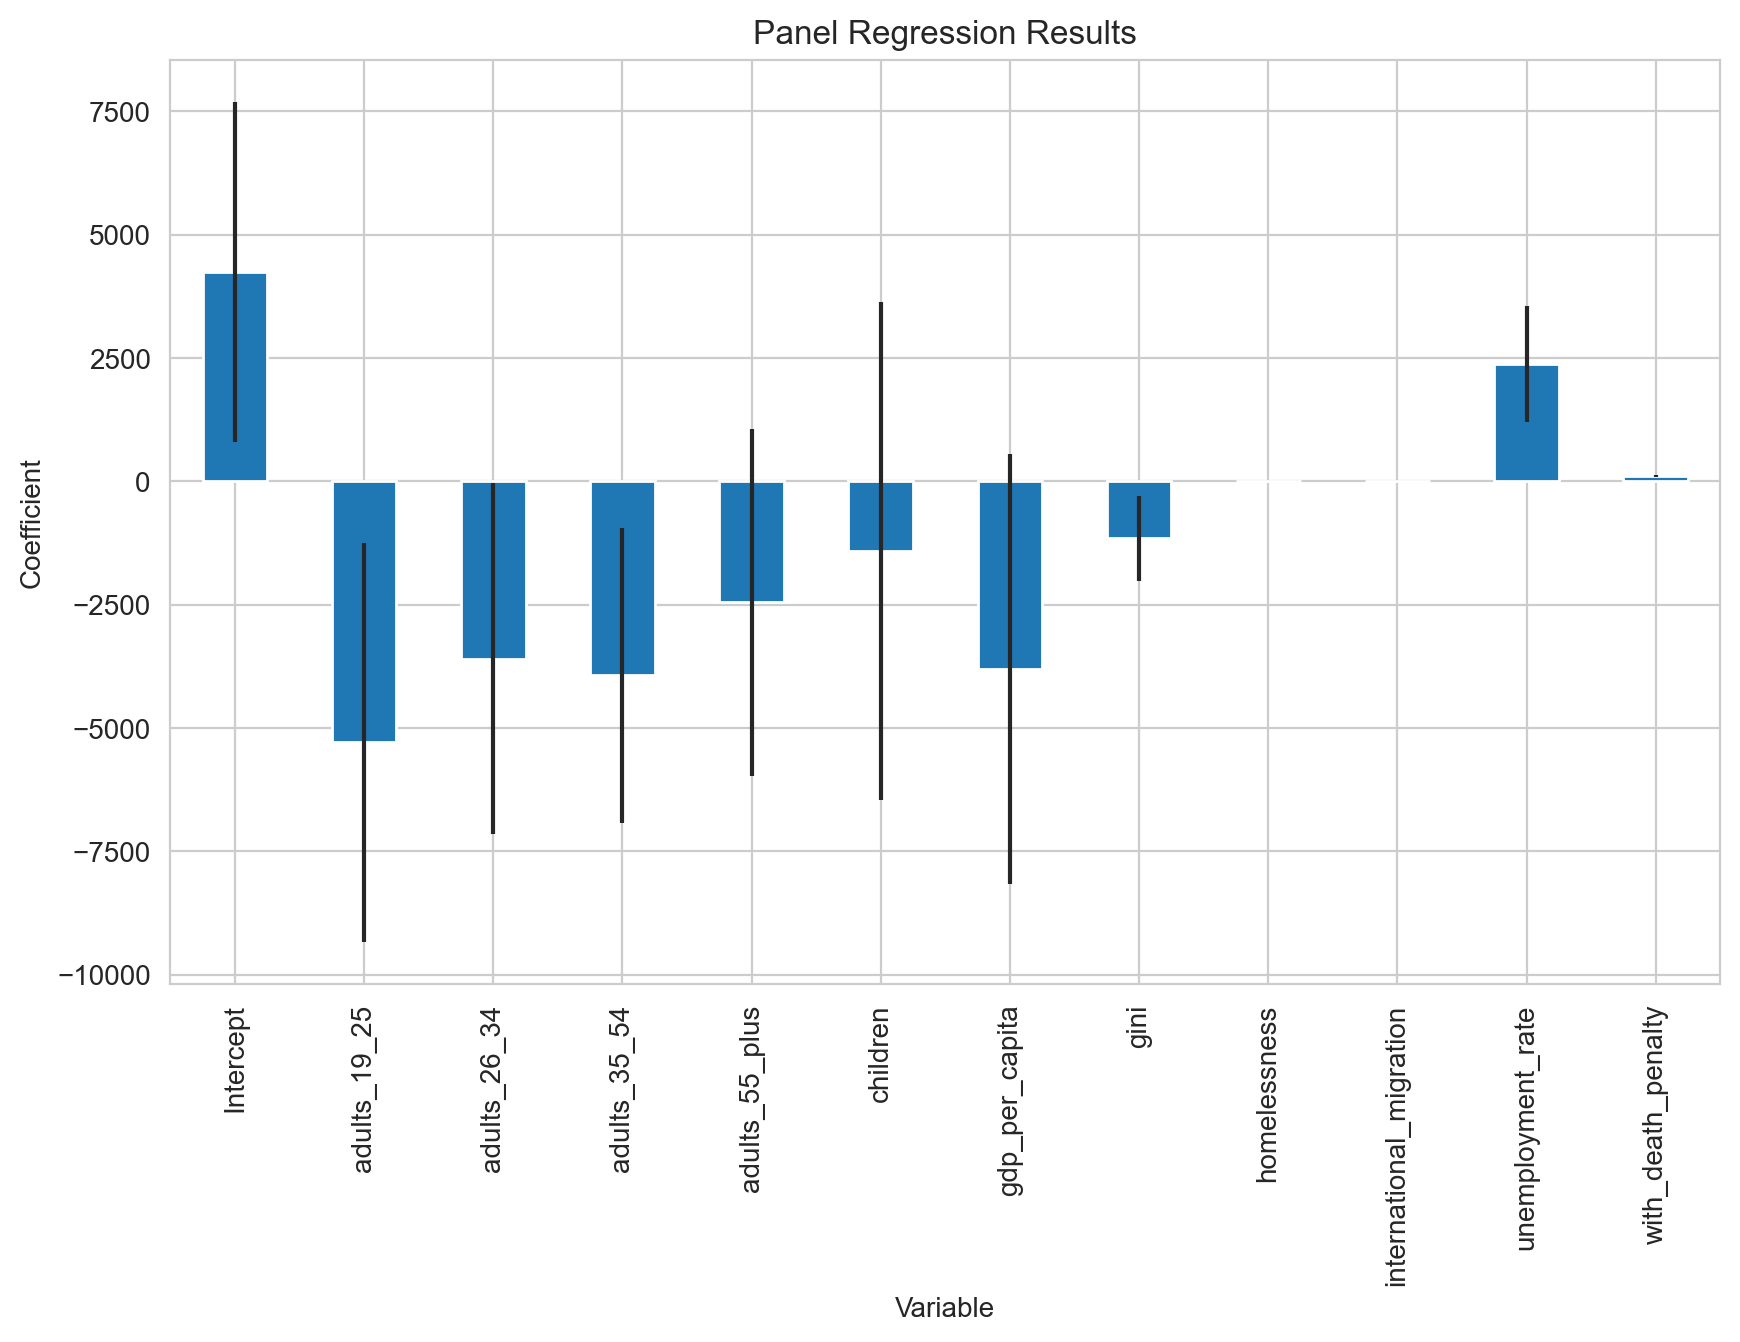

In [153]:
# Extract the relevant coefficients and standard errors
coefficients = results.params
se = results.std_errors

# Create a new DataFrame with the coefficients and standard errors
results_df = pd.concat([coefficients, se], axis=1)
results_df.columns = ['Coefficients', 'Standard Errors']

# Plot the results
results_df.plot(kind='bar', y='Coefficients', yerr='Standard Errors', figsize=(10, 6), legend=None)
plt.title('Panel Regression Results')
plt.ylabel('Coefficient')
plt.xlabel('Variable')
plt.show()


In [154]:
#save the result table to a graph
with open('regression_results.tex', 'w') as f:
    f.write(results.summary.as_latex())


### Discard outliers

In [194]:
df_abnormal.loc[:,['state','year','Violent_Crime_Rate']]

state  year  Violent_Crime_Rate
20       Alaska  2016         1609.122858
21       Alaska  2017         1658.026886
22       Alaska  2018         1783.336213
23       Alaska  2019         1734.138023
358  New Mexico  2018         1685.540638
359  New Mexico  2019         1664.418033

In [195]:
# discard rows in df_abnormal
df_no_outlier = df[~df.index.isin(df_abnormal.index)]

# set multi-index
df_no_outlier_panel = df_no_outlier.set_index(panel_vars)

# Run a fixed effects regression with time and entity fixed effects
model_no_outlier = PanelOLS.from_formula(f"{y_var} ~ 1 + {' + '.join(x_vars)} \
                                         + EntityEffects + TimeEffects", data=df_no_outlier_panel)
results_no_outlier = model_no_outlier.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
print(results_no_outlier.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:     Violent_Crime_Rate   R-squared:                        0.1290
Estimator:                   PanelOLS   R-squared (Between):              0.0574
No. Observations:                 570   R-squared (Within):              -0.2531
Date:                Mon, May 01 2023   R-squared (Overall):              0.0359
Time:                        05:38:21   Log-likelihood                   -3186.5
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      18.769
Entities:                          48   P-value                           0.0000
Avg Obs:                       11.875   Distribution:                   F(4,507)
Min Obs:                       8.0000                                           
Max Obs:                       12.000   F-statistic (robust):             7.4873
                            

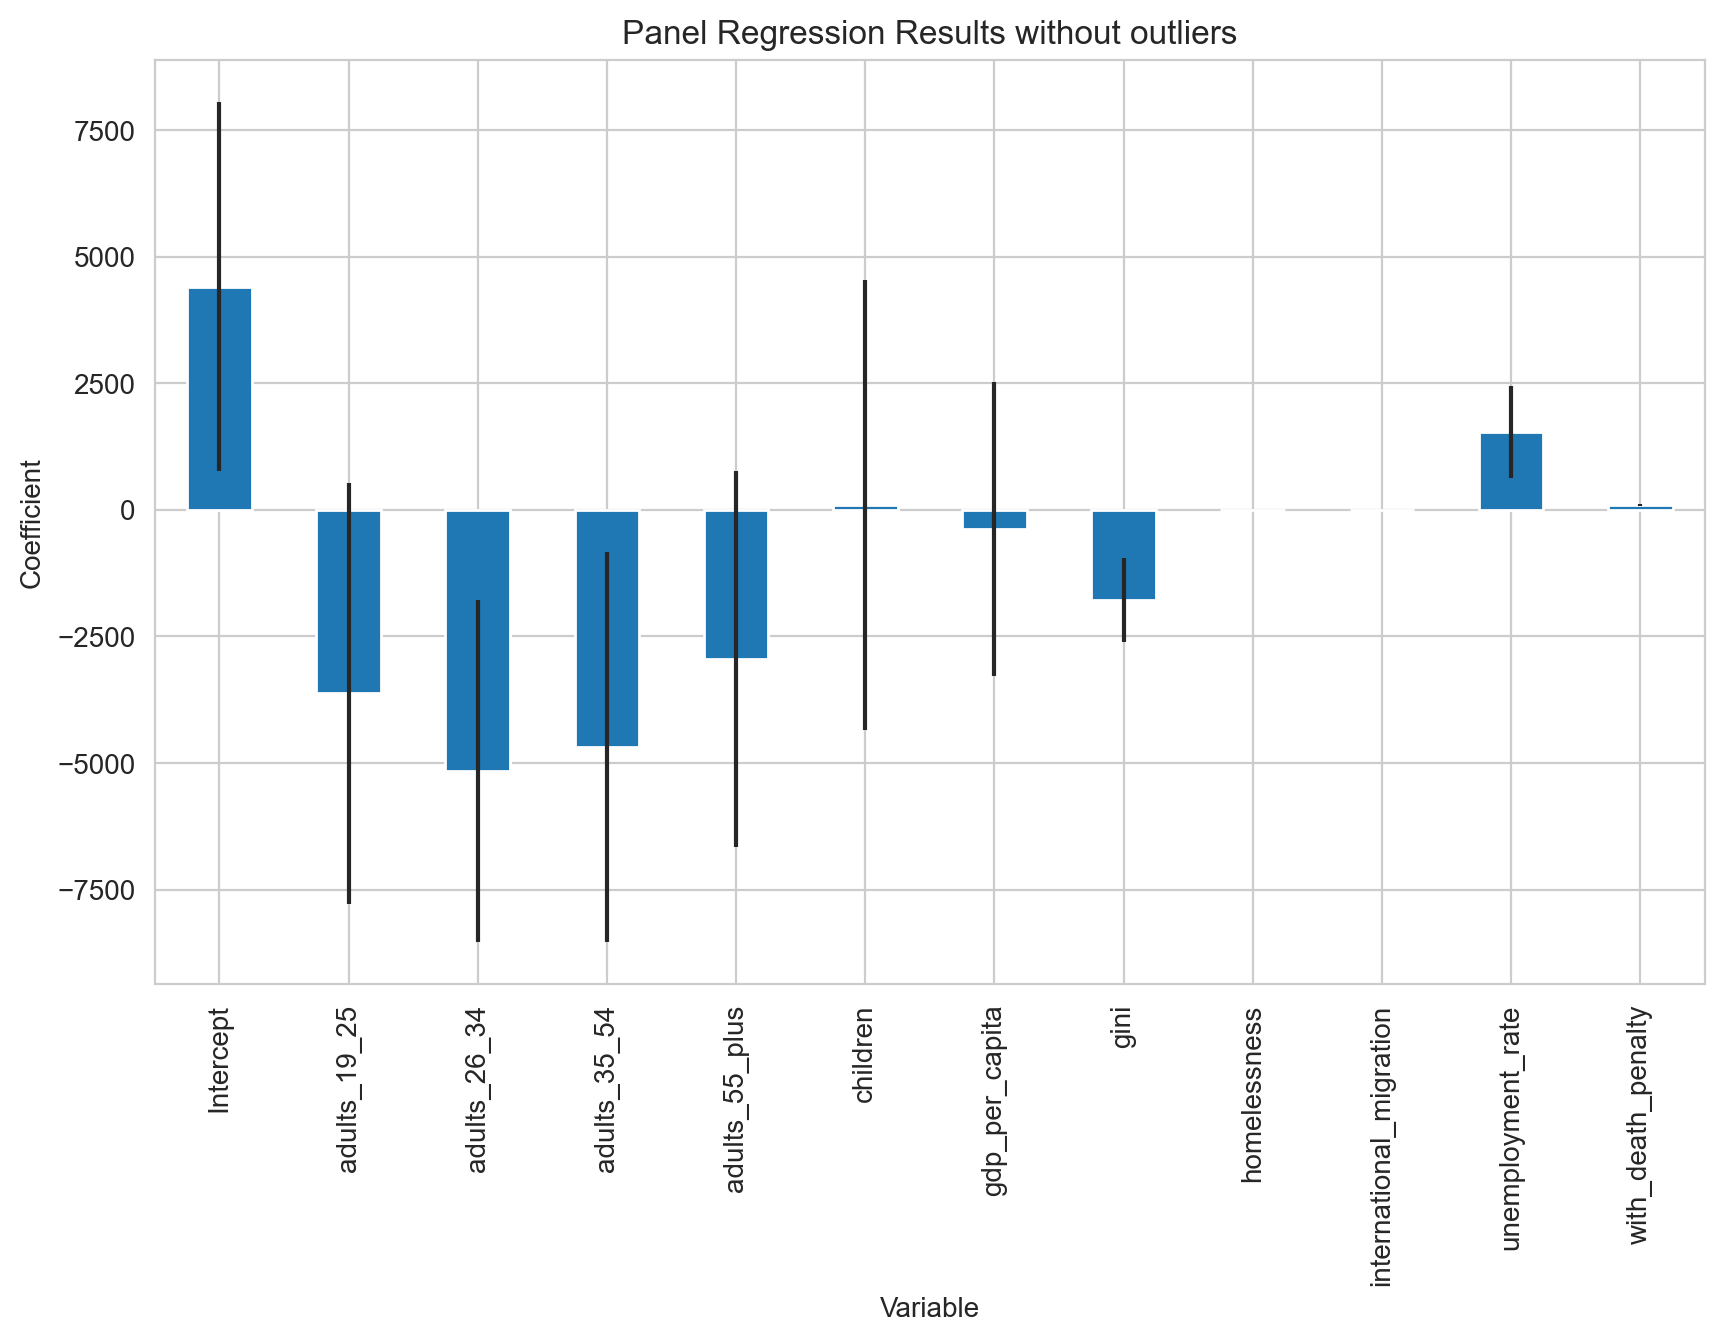

In [157]:
# Extract the relevant coefficients and standard errors
coefficients = results_no_outlier.params
se = results_no_outlier.std_errors

# Create a new DataFrame with the coefficients and standard errors
results_df = pd.concat([coefficients, se], axis=1)
results_df.columns = ['Coefficients', 'Standard Errors']

# Plot the results
results_df.plot(kind='bar', y='Coefficients', yerr='Standard Errors', figsize=(10, 6), legend=None)
plt.title('Panel Regression Results without outliers')
plt.ylabel('Coefficient')
plt.xlabel('Variable')
plt.show()


In [158]:
#save the result table to a graph
with open('regression_results_no_outliers_.tex', 'w') as f:
    f.write(results.summary.as_latex())


### only include states abolish death penalty

In [196]:
# select states in treatment_states
df_tr_states = df[df['state'].isin(treatment_states)]
assert df_tr_states.state.nunique() == 20, "There should be 20 states in the subset."

# set multi-index
df_tr_states_panel = df_tr_states.set_index(panel_vars)

# Run a fixed effects regression with time and entity fixed effects
model_tr_states = PanelOLS.from_formula(f"{y_var} ~ 1 + {' + '.join(x_vars)} + EntityEffects + TimeEffects",\
                               data=df_tr_states_panel)
results_tr_states = model_tr_states.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
print(results_tr_states.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:     Violent_Crime_Rate   R-squared:                        0.3429
Estimator:                   PanelOLS   R-squared (Between):             -0.0927
No. Observations:                 240   R-squared (Within):              -0.8660
Date:                Mon, May 01 2023   R-squared (Overall):             -0.1564
Time:                        05:41:21   Log-likelihood                   -1362.5
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      26.748
Entities:                          20   P-value                           0.0000
Avg Obs:                       12.000   Distribution:                   F(4,205)
Min Obs:                       12.000                                           
Max Obs:                       12.000   F-statistic (robust):             5.0457
                            

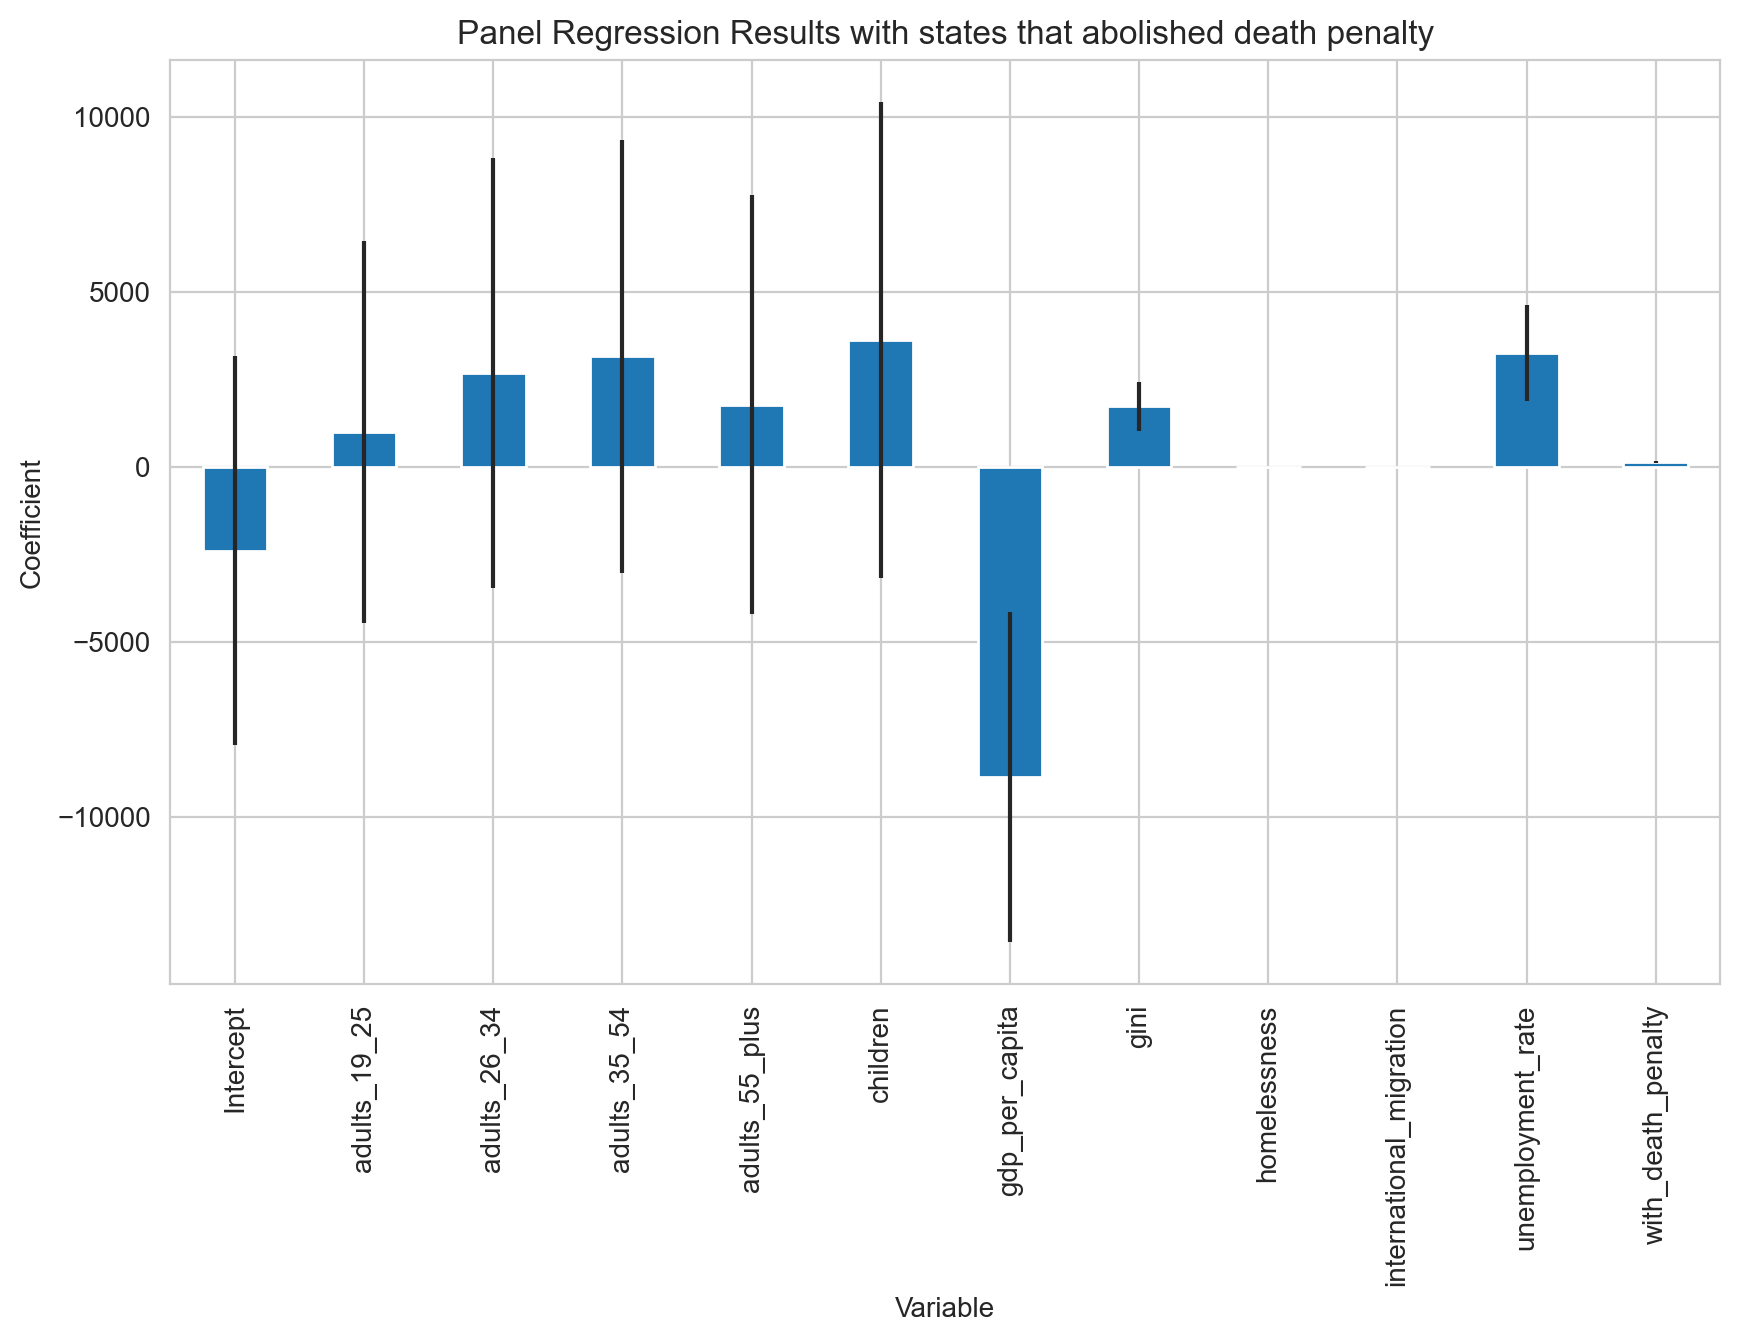

In [160]:
# Extract the relevant coefficients and standard errors
coefficients = results_tr_states.params
se = results_tr_states.std_errors

# Create a new DataFrame with the coefficients and standard errors
results_df = pd.concat([coefficients, se], axis=1)
results_df.columns = ['Coefficients', 'Standard Errors']

# Plot the results
results_df.plot(kind='bar', y='Coefficients', yerr='Standard Errors', figsize=(10, 6), legend=None)
plt.title('Panel Regression Results with states that abolished death penalty')
plt.ylabel('Coefficient')
plt.xlabel('Variable')
plt.show()


In [161]:
#save the result table to a graph
with open('regression_results_tr_states.tex', 'w') as f:
    f.write(results.summary.as_latex())


In [162]:
%config InlineBackend.figure_format='retina'

### Try Matching

In [163]:
df_copy = df.copy()

In [164]:
## Convert numeric variables into categorical
df_copy["State"] = pd.Categorical(df_copy.State).codes
df_copy["year"] = pd.Categorical(df_copy.year).codes

In [165]:
df_copy.columns

Index(['state', 'children', 'adults_19_25', 'adults_26_34', 'adults_35_54',
       'Adults 55-64', '65+', 'year', 'homelessness', 'gdp',
       'American Indian or Alaska Native', 'Asian or Pacific Islander',
       'Black or African American', 'White', 'gini', 'international_migration',
       'unemployment_rate', 'State', 'Population', 'Index', 'Violent',
       'Property', 'Murder', 'Rape', 'Robbery', 'Aggravated Assault',
       'Burglary', 'Larceny-Theft', 'Vehicle Theft', 'with_death_penalty',
       'Violent_Crimes', 'Violent_Crime_Rate', 'gdp_per_capita',
       'adults_55_plus', 'Cluster', 'penalty_category'],
      dtype='object')

In [166]:
df_copy.drop(
    axis=1,
    columns=[ 'year', 'State', 'Adults 55-64', '65+', 'American Indian or Alaska Native','Asian or Pacific Islander',
       'Black or African American', 'White', 'state', 'Violent',
       'Property', 'Murder', 'Rape', 'Robbery', 'Aggravated Assault',
       'Burglary', 'Larceny-Theft', 'Vehicle Theft'],
    inplace = True
)
df_copy.reset_index(inplace=True)


In [167]:
df_copy.drop(axis=1, labels=['index'],inplace=True)

In [168]:
df_copy

children  adults_19_25  adults_26_34  adults_35_54  homelessness  \
0       0.258         0.095         0.113         0.282          5387   
1       0.257         0.093         0.116         0.277          6080   
2       0.254         0.094         0.113         0.276          6046   
3       0.251         0.094         0.112         0.274          5558   
4       0.249         0.095         0.112         0.270          5209   
..        ...           ...           ...           ...           ...   
571     0.256         0.092         0.123         0.244           798   
572     0.255         0.089         0.121         0.245           857   
573     0.253         0.086         0.123         0.236           873   
574     0.243         0.083         0.121         0.244           639   
575     0.251         0.083         0.117         0.242           548   

          gdp    gini  international_migration  unemployment_rate  Population  \
0    174526.3  0.4700                     5409              0.050     4677464   
1    170930.9  0.4700                     5319              0.098     4708708   
2    177249.2  0.4700                     1053              0.093     4785401   
3    183916.6  0.4700                     5162              0.087     4803689   
4    189245.5  0.4700                     6282              0.073     4817528   
..        ...     ...                      ...                ...         ...   
571   38426.9  0.4374                      860              0.042      586555   
572   35879.0  0.4360                      530              0.053      585501   
573   36980.7  0.4326                      795              0.042      578934   
574   39171.7  0.4555                      708              0.041      577601   
575   39428.0  0.4345                      173              0.036      578759   

      Index  with_death_penalty  Violent_Crimes  Violent_Crime_Rate  \
0    211401                   1           42218          902.583109   
1    199201                   1           42388          900.204472   
2    187191                   1           36726          767.459195   
3    193358                   1           40332          839.604729   
4    190571                   1           43386          900.586359   
..      ...                 ...             ...                 ...   
571   12451                   1            2553          435.253301   
572   12890                   1            2805          479.076893   
573   11886                   1            2716          469.138106   
574   11543                   1            2470          427.630839   
575   10351                   1            2516          434.723261   

     gdp_per_capita  adults_55_plus  Cluster  penalty_category  
0          0.037312           0.253        3                 2  
1          0.036301           0.257        0                 2  
2          0.037040           0.264        0                 2  
3          0.038287           0.269        0                 2  
4          0.039283           0.274        0                 2  
..              ...             ...      ...               ...  
571        0.065513           0.284        4                 2  
572        0.061279           0.291        4                 2  
573        0.063877           0.302        4                 2  
574        0.067818           0.310        4                 2  
575        0.068125           0.307        4                 2  

[576 rows x 18 columns]

In [169]:
!pip install dame_flame
import dame_flame

In [170]:
mat_model = dame_flame.matching.DAME(repeats=False,verbose=3, want_pe=True)
mat_model.fit(
    df_copy,
    treatment_column_name="with_death_penalty",
    outcome_column_name="Violent_Crime_Rate",
)

## Display results
result = mat_model.predict(df_copy)

Completed iteration 0 of matching
	Number of matched groups formed in total:  0
	Unmatched treated units:  373 out of a total of  373 treated units
	Unmatched control units:  203 out of a total of  203 control units
	Number of matches made this iteration:  0
	Number of matches made so far:  0
	Covariates dropped so far:  set()
	Predictive error of covariate set used to match:  76244.8128288937
Completed iteration 1 of matching
	Number of matched groups formed in total:  0
	Unmatched treated units:  373 out of a total of  373 treated units
	Unmatched control units:  203 out of a total of  203 control units
	Number of matches made this iteration:  0
	Number of matches made so far:  0
	Covariates dropped so far:  frozenset({'gini'})
	Predictive error of covariate set used to match:  76244.81282889369
Completed iteration 2 of matching
	Number of matched groups formed in total:  0
	Unmatched treated units:  373 out of a total of  373 treated units
	Unmatched control units:  203 out of a tot

KeyboardInterrupt: 

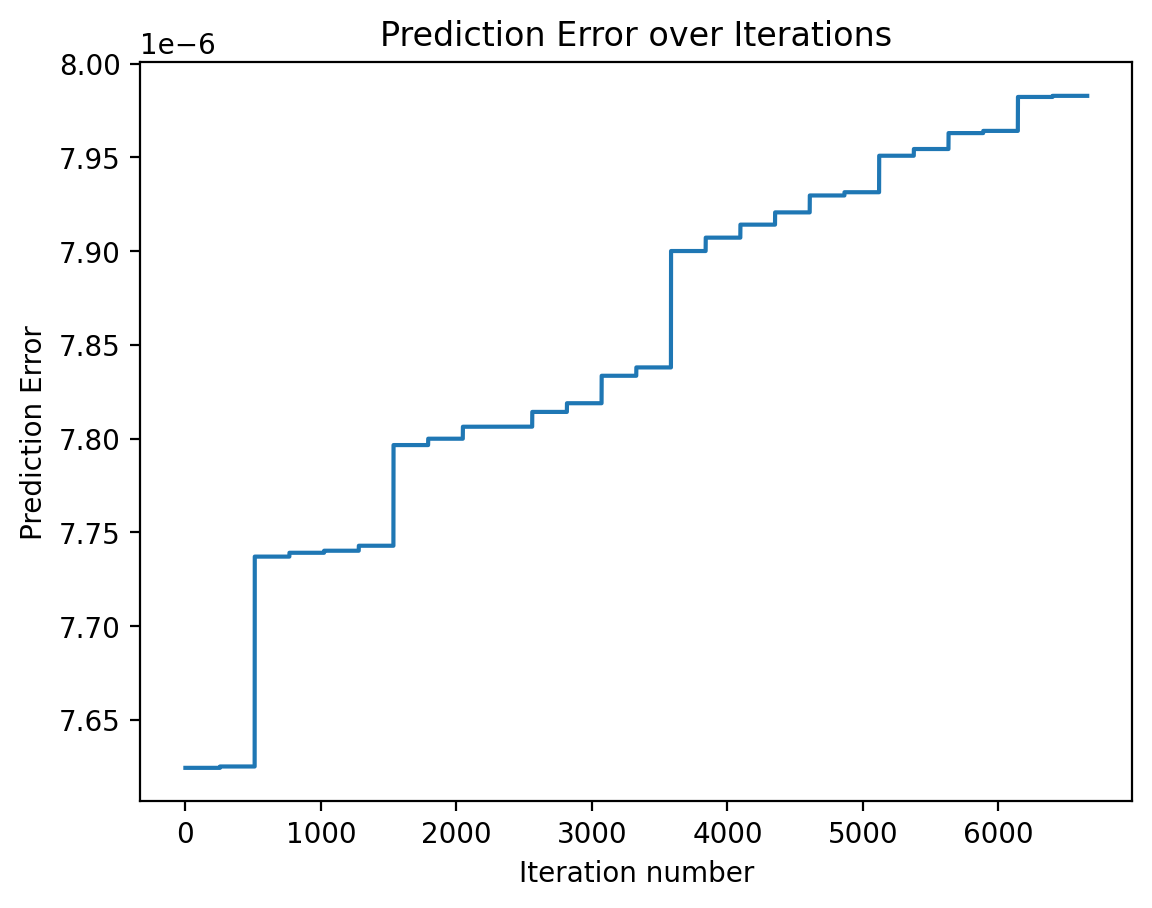

In [ ]:
plt.plot(mat_model.pe_each_iter)
plt.title("Prediction Error over Iterations")
plt.xlabel("Iteration number")
plt.ylabel("Prediction Error")
plt.show()